# Worldwide Airports Dataset Analysis

This analysis aims to explore the [Global Aviation Hub: Dataset of Airports Worldwide](https://www.kaggle.com/datasets/harshalhonde/global-aviation-hub-dataset-of-airports-worldwide/data), from Kagle, by Harshal H, for learning purposes only.
Here I practice data cleanup, datasets and series manipulation and insights visualization.
There are no pre-defined objectives, so, as I explore the data I will dive into whatever I stumble on along the way.

Dataset Columns:
- **Airport Identifiers**: Unique identifiers and codes for each airport, including ICAO, IATA, and local codes.
- **Geographical Coordinates**: Precise latitude and longitude coordinates for accurate mapping and analysis.
- **Elevation**: Elevation data in feet for each airport's location.
- **Geographical Region**: Information about the continent, country, and region where each airport is situated.
- **Municipality**: The city or municipality associated with each airport's location. 
- **Scheduled Service**: Indicates whether the airport offers scheduled commercial air services.
- **Useful Links**: Links to homepages and Wikipedia pages for further information.
- **Keywords**: Keywords that provide additional context and categorization for each airport.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kagglehub
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geodatasets
from shapely.geometry import Polygon
from matplotlib.lines import Line2D

# Get the dataset and setup the pandas dataframe

In [2]:
# Download latest version, at the time of writing this it is version "1".
path = kagglehub.dataset_download("harshalhonde/global-aviation-hub-dataset-of-airports-worldwide")

df = pd.read_csv(f"{path}/airports .csv")
df.head()

id ident           type                  name  latitude_deg  \
0    6523   00A       heliport     Total RF Heliport     40.070985   
1  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
2    6524  00AK  small_airport          Lowell Field     59.947733   
3    6525  00AL  small_airport          Epps Airpark     34.864799   
4  506791  00AN  small_airport  Katmai Lodge Airport     59.093287   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
0     -74.933689          11.0       NaN          US      US-PA      Bensalem   
1    -101.473911        3435.0       NaN          US      US-KS         Leoti   
2    -151.692524         450.0       NaN          US      US-AK  Anchor Point   
3     -86.770302         820.0       NaN          US      US-AL       Harvest   
4    -156.456699          80.0       NaN          US      US-AK   King Salmon   

  scheduled_service gps_code iata_code local_code  \
0                no     K00A       NaN        00A   
1                no     00AA       NaN       00AA   
2                no     00AK       NaN       00AK   
3                no     00AL       NaN       00AL   
4                no     00AN       NaN       00AN   

                                           home_link wikipedia_link keywords  
0  https://www.penndot.pa.gov/TravelInPA/airports...            NaN      NaN  
1                                                NaN            NaN      NaN  
2                                                NaN            NaN      NaN  
3                                                NaN            NaN      NaN  
4                                                NaN            NaN      NaN

# Cleaning up the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          39372 non-null  object 
 8   iso_country        76108 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

We can see that all airports have non-null data on important columns like: ident, type, name, latitude, longitude and iso_region.

In the other hand not all rows of the iso_country and municipality columns are filled. We will see how those null values are distributed. Maybe on big and developed countries the data is all there for us to explore.

In [4]:
df.iso_region.value_counts()

iso_region
US-TX     3659
US-CA     2331
US-FL     1228
BR-SP     1218
GB-ENG    1126
          ... 
BJ-CO        1
SA-11        1
SA-06        1
BJ-AL        1
MN-071       1
Name: count, Length: 2891, dtype: int64

In [5]:
df.query("iso_region.str.contains('US-')").iso_region.value_counts()

iso_region
US-TX     3659
US-CA     2331
US-FL     1228
US-IL     1093
US-AK     1047
US-PA     1037
US-AZ      970
US-OH      907
US-LA      851
US-NY      778
US-IN      770
US-WA      726
US-MO      720
US-OK      676
US-WI      670
US-MI      650
US-MN      648
US-GA      637
US-CO      629
US-OR      621
US-AR      602
US-NC      581
US-VA      566
US-KS      533
US-AL      477
US-NJ      464
US-NM      440
US-ID      439
US-MT      421
US-TN      415
US-UT      409
US-IA      409
US-NV      405
US-MS      355
US-NE      344
US-ND      335
US-KY      321
US-MD      291
US-MA      271
US-ME      267
US-SC      261
US-SD      231
US-NH      208
US-WY      207
US-CT      167
US-WV      148
US-HI      122
US-VT      120
US-DE       60
US-RI       43
US-DC       20
US-U-A       1
Name: count, dtype: int64

In [6]:
len(df.query("iso_region.str.contains('US-')").iso_region.unique())

52

In [7]:
df.query("iso_region.str.contains('BR-')").iso_region.value_counts()

iso_region
BR-SP     1218
BR-MT     1067
BR-MS      803
BR-MG      515
BR-BA      400
BR-PA      381
BR-GO      373
BR-RJ      276
BR-RS      205
BR-PR      203
BR-TO      167
BR-MA      165
BR-SC      153
BR-RR      135
BR-CE      130
BR-AM      113
BR-PI      104
BR-RO       95
BR-PE       92
BR-DF       40
BR-ES       39
BR-RN       39
BR-AL       34
BR-PB       29
BR-AC       28
BR-AP       26
BR-SE        9
BR-U-A       5
Name: count, dtype: int64

In [8]:
len(df.query("iso_region.str.contains('BR-')").iso_region.unique())

28

We can see from the US and BR examples above that the region column is formed by the name of the iso code of the country followed by the iso code of its states.
Considering all region rows are filled, we be able to use that to make the country column complete.

In [9]:
df[df['iso_country'].isna()]

id    ident            type                            name  \
25749  315385     FYAA   small_airport                  Ai-Ais Airport   
25750   29539     FYAB   small_airport                 Aroab B Airport   
25751  315405     FYAK   small_airport              Aussenkehr Airport   
25752   29534     FYAM   small_airport                Aminuis Airstrip   
25753    3024     FYAR  medium_airport                 Arandis Airport   
...       ...      ...             ...                             ...   
46161  322415  NA-0175   small_airport    Farm Dawib Ost Landing Strip   
46162  322416  NA-0176   small_airport        Farm Gurus Landing Strip   
46163  345911  NA-0177   small_airport      Desert Rhino Camp Airstrip   
46164  351688  NA-0178   small_airport  Namushasha River Lodge Airport   
46165  353241  NA-0179   small_airport             Skuit Drift Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
25749    -27.995000      17.596600        2000.0        AF         NaN   
25750    -26.776100      19.633101        3235.0        AF         NaN   
25751    -28.458700      17.464500         970.0        AF         NaN   
25752    -23.655800      19.351700        4012.0        AF         NaN   
25753    -22.461875      14.979322        1905.0        AF         NaN   
...             ...            ...           ...       ...         ...   
46161    -21.774528      15.515361        3503.0        AF         NaN   
46162    -24.076750      17.610417        4061.0        AF         NaN   
46163    -20.036661      13.844147           NaN        AF         NaN   
46164    -17.983840      23.309320        3161.0        AF         NaN   
46165    -28.376640      19.779240        3150.0        AF         NaN   

      iso_region      municipality scheduled_service gps_code iata_code  \
25749      NA-KA            Ai-Ais                no     FYAA       AIW   
25750      NA-KA             Aroab                no     FYAB       NaN   
25751      NA-KA        Aussenkehr                no     FYAK       NaN   
25752      NA-OH           Aminuis                no     FYAM       NaN   
25753      NA-ER           Arandis                no     FYAR       ADI   
...          ...               ...               ...      ...       ...   
46161      NA-ER  Hohenstein Lodge                no      NaN       NaN   
46162      NA-HA          Kalkrand                no      NaN       NaN   
46163      NA-KU               NaN                no      NaN       NaN   
46164      NA-CA            Ngonga                no      NaN       NaN   
46165      NA-KA       Skuit Drift                no      NaN       NaN   

      local_code home_link                                 wikipedia_link  \
25749        NaN       NaN                                            NaN   
25750        NaN       NaN                                            NaN   
25751        NaN       NaN                                            NaN   
25752        NaN       NaN                                            NaN   
25753        NaN       NaN  https://en.wikipedia.org/wiki/Arandis_Airport   
...          ...       ...                                            ...   
46161        NaN       NaN                                            NaN   
46162        NaN       NaN                                            NaN   
46163        NaN       NaN                                            NaN   
46164        NaN       NaN                                            NaN   
46165        NaN       NaN                                            NaN   

      keywords  
25749      NaN  
25750      NaN  
25751      NaN  
25752      NaN  
25753      NaN  
...        ...  
46161      NaN  
46162      NaN  
46163      NaN  
46164      NaN  
46165      NaN  

[259 rows x 18 columns]

We can extract the country codes from the region like:

In [10]:
df[df['iso_country'].isna()]['iso_region'].str[:2]

25749    NA
25750    NA
25751    NA
25752    NA
25753    NA
         ..
46161    NA
46162    NA
46163    NA
46164    NA
46165    NA
Name: iso_region, Length: 259, dtype: object

Seems all values are "NA", from Namibia...

In [11]:
df[df['iso_country'].isna()]['iso_region'].str[:2].unique()

array(['NA'], dtype=object)

Considering Namibia is a very big country, let's consider all the 259 rows with NaN country are from there.

In [12]:
df.loc[df['iso_country'].isna(), 'iso_country'] = df.loc[df['iso_country'].isna(), 'iso_region'].str[:2]

Namibia country codes are correctly set now

In [13]:
df[df['iso_country'].isna()]

Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, elevation_ft, continent, iso_country, iso_region, municipality, scheduled_service, gps_code, iata_code, local_code, home_link, wikipedia_link, keywords]
Index: []

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          39372 non-null  object 
 8   iso_country        76367 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

Let's check the continent column now, see if we can do something about it in an easy way...

In [15]:
df[df['continent'].isna()].iso_country.unique()

array(['US', 'PR', 'AG', 'AI', 'MX', 'AW', 'GL', 'GB', 'BM', 'BQ', 'BS',
       'BZ', 'CA', 'CO', 'CR', 'CU', 'PA', 'DO', 'GT', 'GP', 'HN', 'HT',
       'JM', 'KN', 'KY', 'PM', 'TC', 'GD', 'NI', 'MQ', 'SV', 'MF', 'VI',
       'VE', 'BB', 'DM', 'BL', 'LC', 'CW', 'SX', 'VG', 'MS', 'TT', 'VC'],
      dtype=object)

44 countries with non set continent value. Laborous but doable...

Let's start by checking how existing continent values are set.

In [16]:
df.continent.unique()

array([nan, 'OC', 'AF', 'AN', 'EU', 'AS', 'SA'], dtype=object)

Considering South America is by itself, I would say we are missing NA(North America) and CA(Central America).

Now that we know exactly what to insert on Continent values, let's map the countries to their continents.

In [17]:
country_to_continent = {
    "US": "NA", "PR": "NA", "AG": "NA", "AI": "NA", "MX": "NA", "AW": "NA", "GL": "NA", "GB": "EU", "BM": "NA", "BQ": "NA", "BS": "NA",
    "BZ": "CA", "CA": "NA", "CO": "SA", "CR": "CA", "CU": "NA", "PA": "CA", "DO": "NA", "GT": "CA", "GP": "NA", "HN": "CA", "HT": "NA",
    "JM": "NA", "KN": "NA", "KY": "NA", "PM": "NA", "TC": "NA", "GD": "NA", "NI": "CA", "MQ": "NA", "SV": "CA", "MF": "NA", "VI": "NA",
    "VE": "SA", "BB": "NA", "DM": "NA", "BL": "NA", "LC": "NA", "CW": "NA", "SX": "NA", "VG": "NA", "MS": "NA", "TT": "NA", "VC": "NA"
}

df.loc[df['continent'].isna(), 'continent'] = df.loc[df['continent'].isna(), 'iso_country'].map(country_to_continent)

df.loc[df['continent'].isna()].head()

Empty DataFrame
Columns: [id, ident, type, name, latitude_deg, longitude_deg, elevation_ft, continent, iso_country, iso_region, municipality, scheduled_service, gps_code, iata_code, local_code, home_link, wikipedia_link, keywords]
Index: []

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76367 entries, 0 to 76366
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76367 non-null  int64  
 1   ident              76367 non-null  object 
 2   type               76367 non-null  object 
 3   name               76367 non-null  object 
 4   latitude_deg       76367 non-null  float64
 5   longitude_deg      76367 non-null  float64
 6   elevation_ft       61969 non-null  float64
 7   continent          76367 non-null  object 
 8   iso_country        76367 non-null  object 
 9   iso_region         76367 non-null  object 
 10  municipality       71317 non-null  object 
 11  scheduled_service  76367 non-null  object 
 12  gps_code           41345 non-null  object 
 13  iata_code          8889 non-null   object 
 14  local_code         32792 non-null  object 
 15  home_link          3694 non-null   object 
 16  wikipedia_link     110

Considering would be hard and time consuming to fill elevation and municipality missing data, let's call the data cleanup complete for this study.

# Exploring data

## How many countries does this dataset include?

In [19]:
len(df.iso_country.unique())

245

## What are the airport types we have?

In [20]:
df.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

## What are the top 10 countries when it comes to the number of airports?

In [21]:
top_10_countries = df.groupby("iso_country")['id'].count().sort_values(ascending=False).head(10)
top_10_countries

iso_country
US    30581
BR     6844
JP     3430
CA     3073
AU     2576
MX     2288
RU     1551
KR     1400
GB     1398
DE     1037
Name: id, dtype: int64

1. USA
2. Brazil
3. Japan
4. Canada
5. Australia
6. Mexico
7. Russia
8. South Korea
9. United Kingdom of Great Britain and Northern Ireland
10. Germany

In [22]:
country_mapping = {
    "US": "United States of America",
    "BR": "Brazil",
    "JP": "Japan",
    "CA": "Canada",
    "AU": "Australia",
    "MX": "Mexico",
    "RU": "Russia",
    "KR": "South Korea",
    "GB": "United Kingdom",
    "DE": "Germany"
}

full_country_names = [country_mapping.get(code, code) for code in top_10_countries.index]

In [23]:
sns.set_theme()

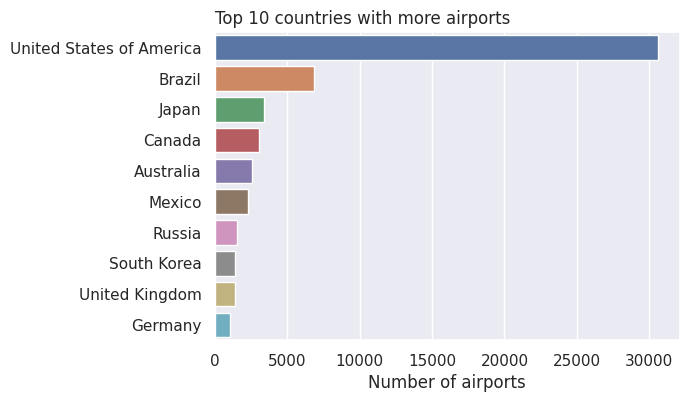

In [24]:
top_10_countries_fig, top_10_countries_ax = plt.subplots(figsize=(6,4))
top_10_countries_ax = sns.barplot(y= full_country_names, x=top_10_countries.values, hue=full_country_names, orient="h")
top_10_countries_ax.set_title("Top 10 countries with more airports", loc="left")
top_10_countries_ax.set_xlabel("Number of airports")
top_10_countries_ax.set_ylabel("")

plt.show()

## What are the top 10 countries with more airports (USA and Brazil excluded)?

As USA and Brazil have a huge number of airports in comparison to the other countries in the dataset, let's check the top 10 without considering USA and Brazil.

In [25]:
top_10_countries_no_usa_br = df.groupby("iso_country")['id'].count().sort_values(ascending=False)[2:12]
top_10_countries_no_usa_br

iso_country
JP    3430
CA    3073
AU    2576
MX    2288
RU    1551
KR    1400
GB    1398
DE    1037
FR    1001
AR     941
Name: id, dtype: int64

In [26]:
country_mapping_no_usa_br = {
    "JP": "Japan",
    "CA": "Canada",
    "AU": "Australia",
    "MX": "Mexico",
    "RU": "Russia",
    "KR": "South Korea",
    "GB": "United Kingdom",
    "DE": "Germany",
    "FR": "France",
    "AR": "Argentina"
}

full_country_names_no_usa_br = [country_mapping_no_usa_br.get(code, code) for code in top_10_countries_no_usa_br.index]

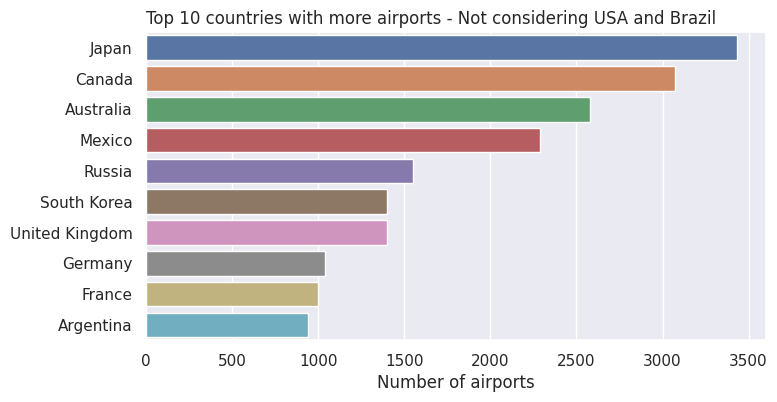

In [27]:
top_10_countries_no_usa_br_fig, top_10_countries_no_usa_br_ax = plt.subplots(figsize=(8,4))
top_10_countries_no_usa_br_ax = sns.barplot(y= full_country_names_no_usa_br, x=top_10_countries_no_usa_br.values, hue=full_country_names_no_usa_br, orient="h")
top_10_countries_no_usa_br_ax.set_title("Top 10 countries with more airports - Not considering USA and Brazil", loc="left")
top_10_countries_no_usa_br_ax.set_xlabel("Number of airports")
top_10_countries_no_usa_br_ax.set_ylabel("")

plt.show()

## What are the bottom 10 countries when it comes to the number of airports?

In [28]:
df.groupby("iso_country")['id'].count().sort_values(ascending=True).head(10)

iso_country
CW    1
SX    1
IO    1
VA    1
BL    1
NF    1
CX    1
NR    1
GM    1
GS    1
Name: id, dtype: int64

1. Curaçao
2. Sint Maarten
3. British Indian Ocean Territory
4. Holy See
5. Saint Barthélemy
6. Norfolk Island
7. Christmas Island
8. Nauru
9. Gambia
10. South Georgia and the South Sandwich Islands

These are the bottom 10 countries by the order they appear in the dataset, but there might be a few more small countries with only one airport (at least in this list):

In [29]:
iso_country_grouped_df_sizes = df.groupby("iso_country").size()

single_airport_countries = iso_country_grouped_df_sizes[iso_country_grouped_df_sizes == 1]

number_of_single_airport_countries = len(single_airport_countries)

print(f"Number of countries with a single airport: {number_of_single_airport_countries}")

Number of countries with a single airport: 15


In [30]:
iso_country_grouped_df_sizes.sort_values(ascending=True).head(15)

iso_country
CW    1
SX    1
IO    1
VA    1
BL    1
NF    1
CX    1
NR    1
GM    1
GS    1
CC    1
NU    1
JE    1
YT    1
GI    1
dtype: int64

11. Cocos Islands
12. Niue
13. Jersey
14. Mayotte
15. Gibraltar

## Is there a classification required for having scheduled services on an airport?

In [31]:
df.groupby(["type", "scheduled_service"])[["scheduled_service"]].count()

scheduled_service
type           scheduled_service                   
balloonport    no                                49
closed         no                             10778
               yes                               20
heliport       no                             19298
               yes                              101
large_airport  no                                 9
               yes                              458
medium_airport no                              1958
               yes                             2794
seaplane_base  no                              1128
               yes                               36
small_airport  no                             38883
               yes                              855

We can see that when it comes to medium and large airports the majority of them have scheduled services available. But their size doesn't influence that alone.

Let's have a better view of only the small, medium and large airports...

In [32]:
sml_df = df[df['type'].isin(['small_airport', 'medium_airport', 'large_airport'])]

In [33]:
scheduled_services_by_type = sml_df.groupby(['type', 'scheduled_service']).size().unstack(fill_value=0)
scheduled_services_by_type

scheduled_service     no   yes
type                          
large_airport          9   458
medium_airport      1958  2794
small_airport      38883   855

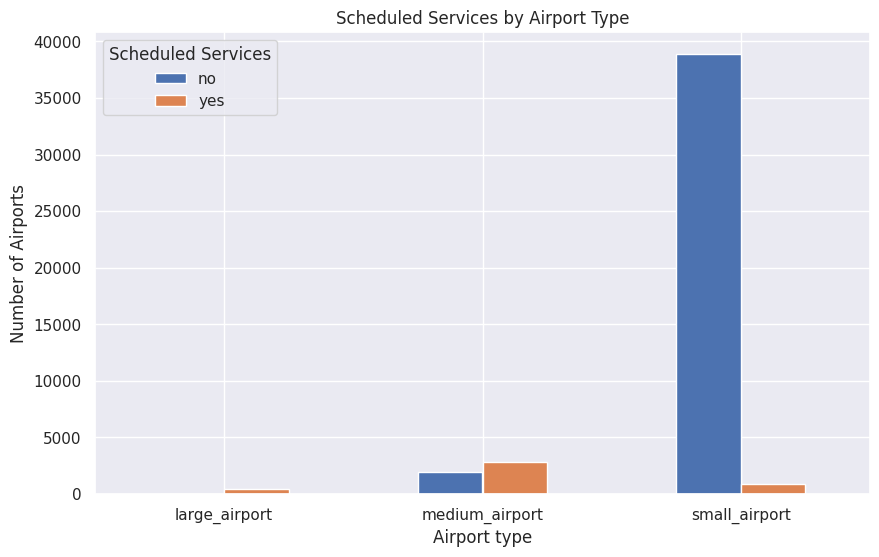

In [34]:
fig, ax = plt.subplots(figsize=(10,6))
ax = scheduled_services_by_type.plot(kind='bar', stacked=False, ax=ax)
plt.title("Scheduled Services by Airport Type")
plt.xlabel("Airport type")
plt.ylabel("Number of Airports")
plt.xticks(rotation=0)
plt.legend(title="Scheduled Services")
plt.show()

## What is the proportion of scheduled services for each airport type?

In [35]:
percentages = scheduled_services_by_type.div(scheduled_services_by_type.sum(axis=1), axis=0) * 100
percentages

scheduled_service         no        yes
type                                   
large_airport       1.927195  98.072805
medium_airport     41.203704  58.796296
small_airport      97.848407   2.151593

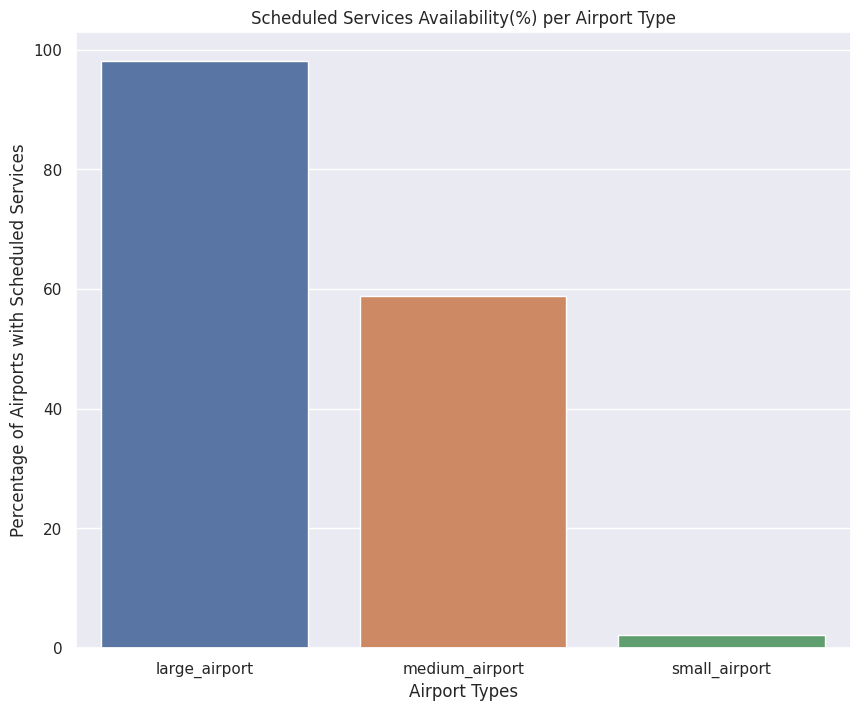

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(data=percentages.sort_values(by = "yes", ascending=False), x = "type", y="yes", hue="type")
ax.set(title="Scheduled Services Availability(%) per Airport Type", xlabel="Airport Types", ylabel="Percentage of Airports with Scheduled Services")
plt.show()

The percentage of scheduled services availability per airport type is:
- 98.07% on large airports.
- 58.80% on medium airports.
- 2.15% on small airports.

## What is the availability of scheduled services per country (on the top 10)

In [37]:
top10_sml_df = sml_df[sml_df.iso_country.isin(top_10_countries.index)]
top10_sml_df.head()

id ident           type                  name  latitude_deg  \
1  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
2    6524  00AK  small_airport          Lowell Field     59.947733   
3    6525  00AL  small_airport          Epps Airpark     34.864799   
4  506791  00AN  small_airport  Katmai Lodge Airport     59.093287   
6  322127  00AS  small_airport        Fulton Airport     34.942803   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
1    -101.473911        3435.0        NA          US      US-KS         Leoti   
2    -151.692524         450.0        NA          US      US-AK  Anchor Point   
3     -86.770302         820.0        NA          US      US-AL       Harvest   
4    -156.456699          80.0        NA          US      US-AK   King Salmon   
6     -97.818019        1100.0        NA          US      US-OK          Alex   

  scheduled_service gps_code iata_code local_code home_link wikipedia_link  \
1                no     00AA       NaN       00AA       NaN            NaN   
2                no     00AK       NaN       00AK       NaN            NaN   
3                no     00AL       NaN       00AL       NaN            NaN   
4                no     00AN       NaN       00AN       NaN            NaN   
6                no     00AS       NaN       00AS       NaN            NaN   

  keywords  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
6      NaN

In [38]:
scheduled_services_by_country = top10_sml_df.groupby(["iso_country", "scheduled_service"]).size().unstack(fill_value=0)
scheduled_services_by_country

scheduled_service     no  yes
iso_country                  
AU                  1986  162
BR                  4686  148
CA                  1175  246
DE                   801   35
GB                   994   52
JP                   194   84
KR                    73   15
MX                  1371   75
RU                   715  171
US                 15333  472

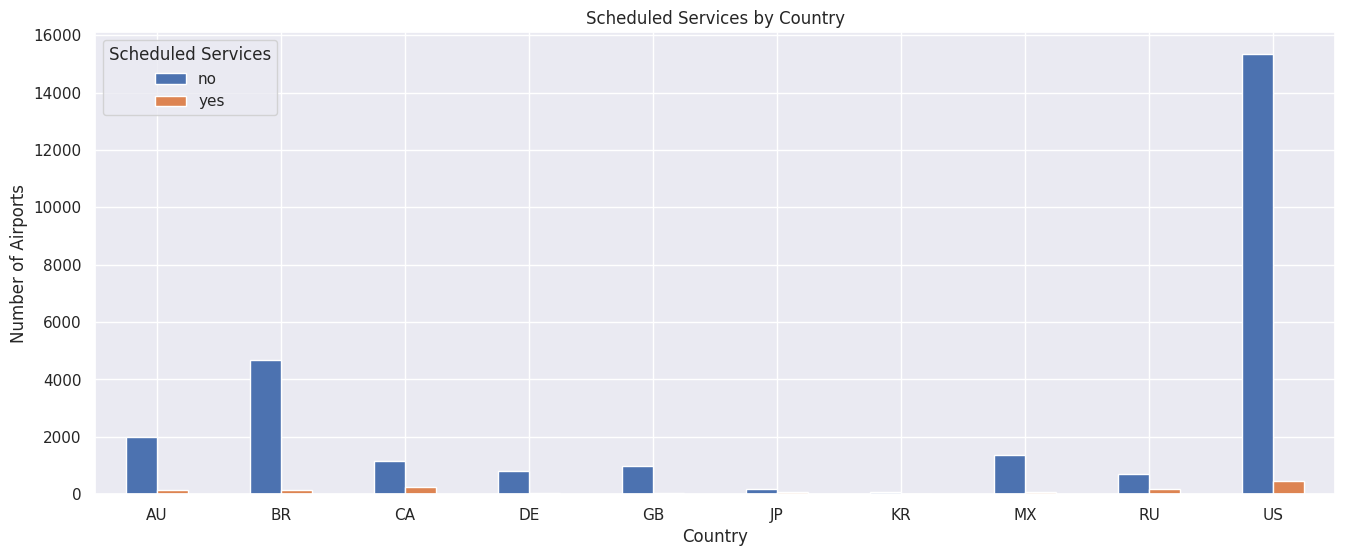

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
ax = scheduled_services_by_country.plot(kind='bar', stacked=False, ax=ax)
plt.title("Scheduled Services by Country")
plt.xlabel("Country")
plt.ylabel("Number of Airports")
plt.xticks(rotation=0)
plt.legend(title="Scheduled Services")
plt.show()

As USA is out of the curve on the number of airports and event more on the proportion between scheduled services availability and number of airports, let's check the data without it...

## What is the availability of scheduled services per country (on the top 10 without USA)

In [40]:
top_10_countries_no_usa = df[df.iso_country != "US"].groupby("iso_country")["iso_country"].count().sort_values(ascending=False).head(10)
top_10_countries_no_usa

iso_country
BR    6844
JP    3430
CA    3073
AU    2576
MX    2288
RU    1551
KR    1400
GB    1398
DE    1037
FR    1001
Name: iso_country, dtype: int64

In [41]:
top10_sml_df = sml_df[sml_df.iso_country.isin(top_10_countries_no_usa.index)]
top10_sml_df.head()

id    ident           type                                 name  \
11255  314491      AGY  small_airport                 Argyle Downs Airport   
11482   45229      AMC  small_airport  Mar de Cortés International Airport   
11495  312361      ANZ  small_airport                  Angus Downs Airport   
12432   38201  AU-0002  small_airport                  Dwellingup Airstrip   
12433   38202  AU-0003  small_airport        Tjukayirla Roadhouse Airstrip   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
11255    -16.508604     128.922485         407.0        OC          AU   
11482     31.351987    -113.305177          71.0        NA          MX   
11495    -25.032500     132.274800        1724.0        OC          AU   
12432    -32.692699     116.074997           NaN        OC          AU   
12433    -27.155199     124.584999        1425.0        OC          AU   

      iso_region         municipality scheduled_service gps_code iata_code  \
11255      AU-WA         Argyle Downs                no      NaN       AGY   
11482     MX-SON       Puerto Peñasco               yes     MMPE       PPE   
11495      AU-NT  Angus Downs Station                no     YADN       ANZ   
12432      AU-WA           Dwellingup                no      NaN       NaN   
12433      AU-WA        Cosmo Newbery                no      NaN       NaN   

      local_code                               home_link  \
11255        NaN                                     NaN   
11482        AMC  https://www.aeropuertomardecortes.com/   
11495        NaN                                     NaN   
12432        A01                                     NaN   
12433        A02                                     NaN   

                                          wikipedia_link  \
11255  https://en.wikipedia.org/wiki/Argyle_Downs_Air...   
11482  https://en.wikipedia.org/wiki/Mar_de_Cort%C3%A...   
11495                                                NaN   
12432                                                NaN   
12433                                                NaN   

                                       keywords  
11255                                       AGY  
11482                                       NaN  
11495                                       NaN  
12432  http://sabc.org.au/knav/airport/A01.html  
12433                                       NaN

In [42]:
scheduled_services_by_country = top10_sml_df.groupby(["iso_country", "scheduled_service"]).size().unstack(fill_value=0)
scheduled_services_by_country

scheduled_service    no  yes
iso_country                 
AU                 1986  162
BR                 4686  148
CA                 1175  246
DE                  801   35
FR                  591   60
GB                  994   52
JP                  194   84
KR                   73   15
MX                 1371   75
RU                  715  171

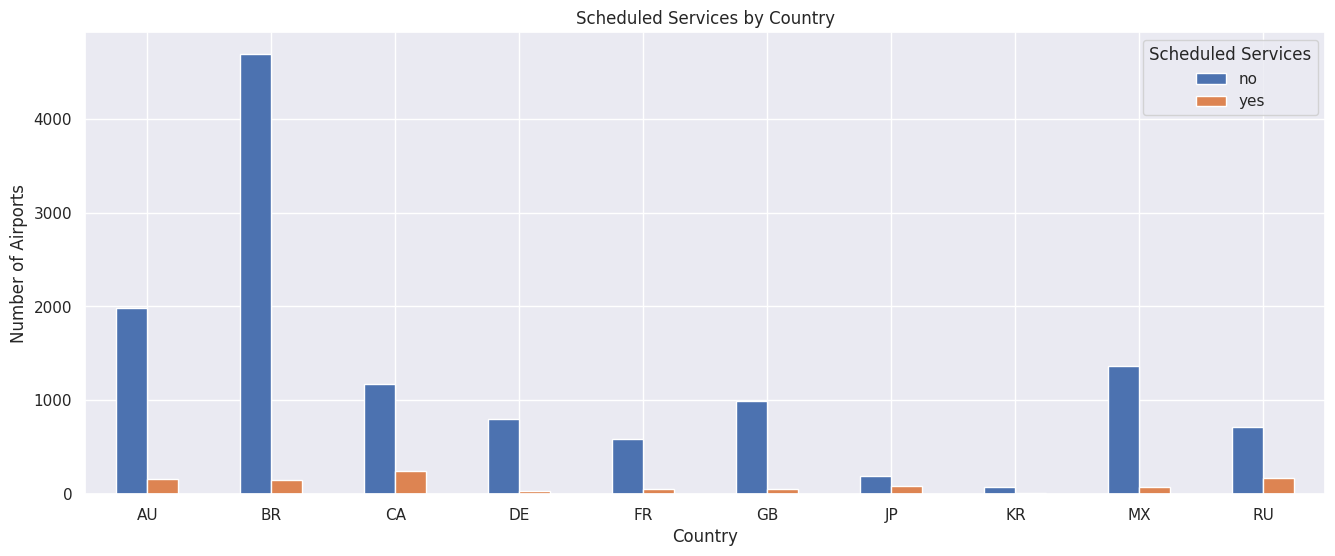

In [43]:
fig, ax = plt.subplots(figsize=(16,6))
ax = scheduled_services_by_country.plot(kind='bar', stacked=False, ax=ax)
plt.title("Scheduled Services by Country")
plt.xlabel("Country")
plt.ylabel("Number of Airports")
plt.xticks(rotation=0)
plt.legend(title="Scheduled Services")
plt.show()

We can see that it is sort of global pattern to have only a small percentage of airports with scheduled services available. Which is not surprising given the amount of infrastructure needed to be able to support commercial flights. As we seen above, around 98% of large airports have scheduled services, while medium and small have numbers around 58% and 2% respectively. So, if we compare this raw estimate to each of the countries airports qunatities, it might not be that surprising that, for example, DE and FR have only a few airports with scheduled services, even being such developed countries.

In [44]:
percentages = scheduled_services_by_country.div(scheduled_services_by_country.sum(axis=1), axis=0) * 100
percentages

scheduled_service         no        yes
iso_country                            
AU                 92.458101   7.541899
BR                 96.938353   3.061647
CA                 82.688248  17.311752
DE                 95.813397   4.186603
FR                 90.783410   9.216590
GB                 95.028681   4.971319
JP                 69.784173  30.215827
KR                 82.954545  17.045455
MX                 94.813278   5.186722
RU                 80.699774  19.300226

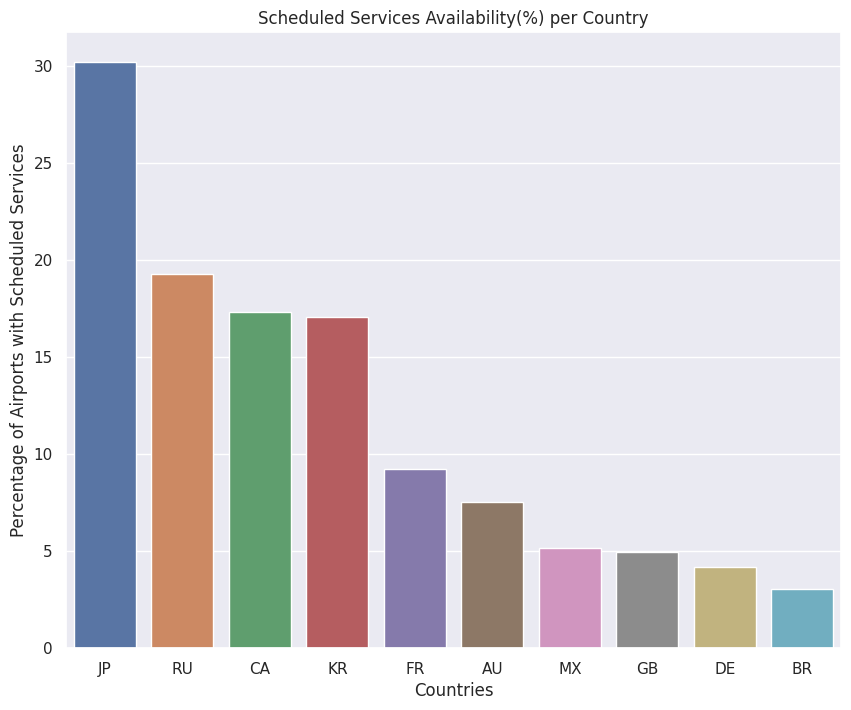

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=percentages.sort_values(by = "yes", ascending=False), x = "iso_country", y="yes", hue="iso_country")
ax.set(title="Scheduled Services Availability(%) per Country", xlabel="Countries", ylabel="Percentage of Airports with Scheduled Services")
plt.show()

We can see Japan has the highest proportion of scheduled services availability on the top 10, followed by Russia, Canada and Korea, these last three very close to each other.

We could raise some theories to explain this, like country size, GDP, country importance on the market, etc. All of them would require deeper analysis of each of the countries conditions.

What we can do here is to compare the amount of airports on those countries with the proportion above presented and try to find some relationship.

In [71]:
scheduled_services_by_country_by_type = top10_sml_df.groupby(["iso_country", "type", "scheduled_service"]).size().unstack(fill_value=0).reset_index()
scheduled_services_by_country_by_type = scheduled_services_by_country_by_type.melt(id_vars=["iso_country", "type"], value_vars=["yes", "no"], var_name="scheduled_service", value_name="count")
scheduled_services_by_country_by_type.head()

iso_country            type scheduled_service  count
0          AU   large_airport               yes      6
1          AU  medium_airport               yes    110
2          AU   small_airport               yes     46
3          BR   large_airport               yes      9
4          BR  medium_airport               yes     84

In [79]:
# plot chart containing country and type on X axis, where each bar is a stacked bar for scheduled services count.

In [92]:
fig = px.bar(scheduled_services_by_country_by_type, x="iso_country", y="count", color="type", barmode="group", height=1000)
fig.show()

# How is the distribution of airports throughout the USA map?

Being able to plot data on a map is a very useful skill to have. So, considering USA has the most airports on our dataset and that its territory map will require some fancy plotting techniques, I think it will be a good exercise to plot its airports on the map.

I will start simple and improve it as I go through this.

### How is the data completion considering only the USA?

In [36]:
df.query("iso_country == 'US'").info()

<class 'pandas.core.frame.DataFrame'>
Index: 30581 entries, 0 to 76364
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 30581 non-null  int64  
 1   ident              30581 non-null  object 
 2   type               30581 non-null  object 
 3   name               30581 non-null  object 
 4   latitude_deg       30581 non-null  float64
 5   longitude_deg      30581 non-null  float64
 6   elevation_ft       28576 non-null  float64
 7   continent          30581 non-null  object 
 8   iso_country        30581 non-null  object 
 9   iso_region         30581 non-null  object 
 10  municipality       30524 non-null  object 
 11  scheduled_service  30581 non-null  object 
 12  gps_code           20247 non-null  object 
 13  iata_code          1967 non-null   object 
 14  local_code         21177 non-null  object 
 15  home_link          1136 non-null   object 
 16  wikipedia_link     2565 non

We can see that municipality is almost all filled. Would be nice to have it all set. We might approach that later on.

Anyway, that was just curiosity. I want now to use the latitude and longitude to plot the airports in a map.

### Plotting the USA Airports Map

First we create a copy of our dataset with only the USA airports.

In [37]:
usa_airports = df.query("iso_country == 'US'")

Now we create a GeoDataFrame using GeoPandas, which contains the geo points we need for plotting the map.

In [38]:
geometry = [Point(xy) for xy in zip(usa_airports['longitude_deg'], usa_airports['latitude_deg'])]
airports_gdf = GeoDataFrame(usa_airports, geometry=geometry, crs="EPSG:4326")

We now load the USA map:

In [39]:
usa_map = gpd.read_file(geodatasets.get_path("geoda.us_sdoh"))

And now we can plot the map...

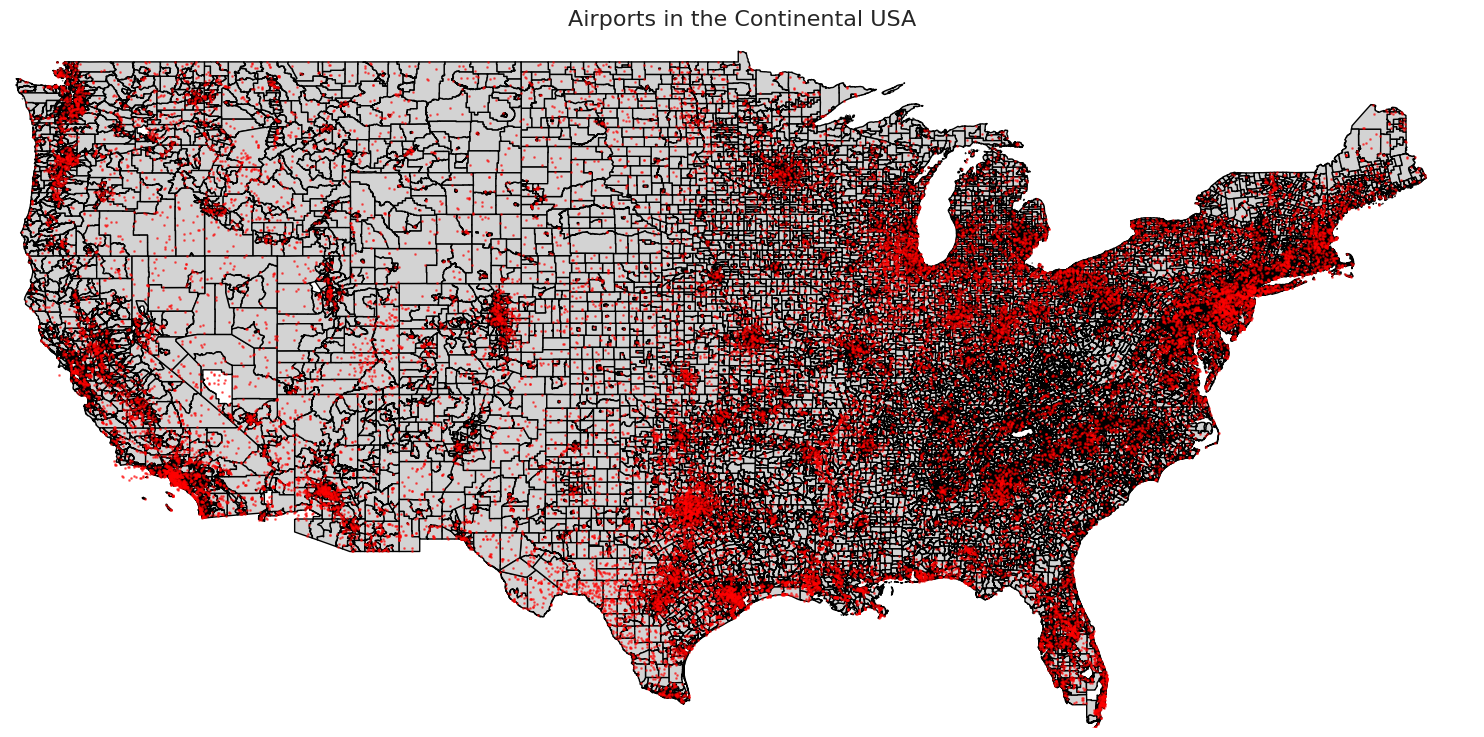

In [40]:
usa_airports_fig, usa_airports_ax = plt.subplots(figsize=(15,10))

# Plot the map
usa_map.plot(ax=usa_airports_ax, color='lightgrey', edgecolor='black')

# Plot the airports
airports_gdf.plot(ax=usa_airports_ax, color='red', markersize=1, alpha=0.5)

plt.title('Airports in the Continental USA', fontsize=16)
usa_airports_ax.axis('off')

# Adjust plot limits to focus on continental USA. Believe me, you want that.
plt.xlim(-125, -65)
plt.ylim(25, 50)

plt.tight_layout()
plt.show()

Let's do it again but only with active airports of types small, medium and large.

In [41]:
usa_airports = df.query("iso_country == 'US' and type in ('small_airport', 'medium_airport', 'large_airport')")

In [42]:
geometry = [Point(xy) for xy in zip(usa_airports['longitude_deg'], usa_airports['latitude_deg'])]
airports_gdf = GeoDataFrame(usa_airports, geometry=geometry, crs="EPSG:4326")

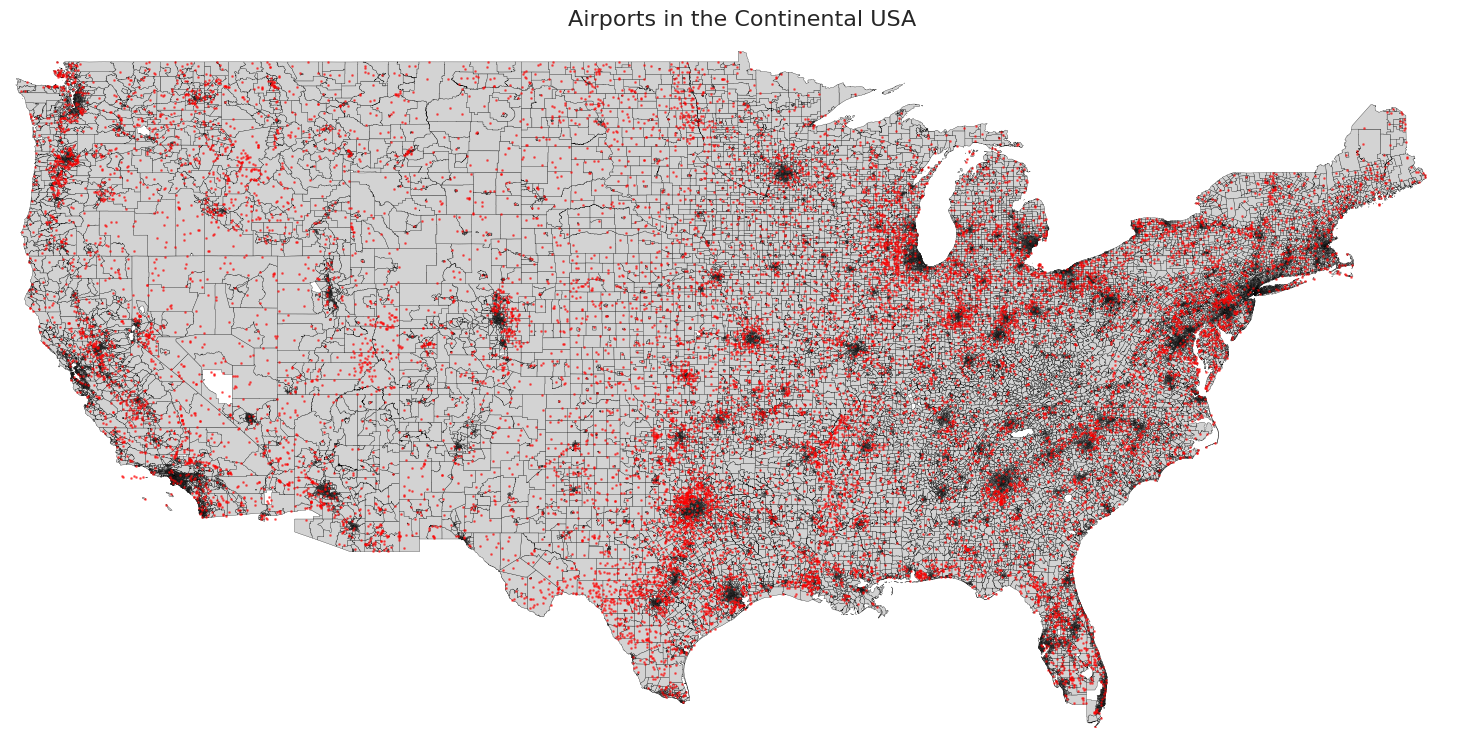

In [43]:
usa_airports_fig, usa_airports_ax = plt.subplots(figsize=(15,10))

# Plot the map
usa_map.plot(ax=usa_airports_ax, color='lightgrey', edgecolor='black', linewidth=0.2)

# Plot the airports
airports_gdf.plot(ax=usa_airports_ax, color='red', markersize=1, alpha=0.5)

plt.title('Airports in the Continental USA', fontsize=16)
usa_airports_ax.axis('off')

# Adjust plot limits to focus on continental USA. Believe me, you want that.
plt.xlim(-125, -65)
plt.ylim(25, 50)

plt.tight_layout()
plt.show()

### Including Alaska in the map

Would be nice to include Alaska in the map...

First we get a dataframe with only the data we will need

In [44]:
usa_airports = usa_airports[['ident', 'type', 'name', 'latitude_deg', 'longitude_deg', 'elevation_ft', 'iso_region', 'municipality', 'scheduled_service']]
usa_airports.head()

ident           type                  name  latitude_deg  longitude_deg  \
1  00AA  small_airport  Aero B Ranch Airport     38.704022    -101.473911   
2  00AK  small_airport          Lowell Field     59.947733    -151.692524   
3  00AL  small_airport          Epps Airpark     34.864799     -86.770302   
4  00AN  small_airport  Katmai Lodge Airport     59.093287    -156.456699   
6  00AS  small_airport        Fulton Airport     34.942803     -97.818019   

   elevation_ft iso_region  municipality scheduled_service  
1        3435.0      US-KS         Leoti                no  
2         450.0      US-AK  Anchor Point                no  
3         820.0      US-AL       Harvest                no  
4          80.0      US-AK   King Salmon                no  
6        1100.0      US-OK          Alex                no

Then set a column on our dataset for holding the state abbreviation, so we can map it later on to a map.

In [45]:
usa_airports['state'] = usa_airports.iso_region.apply(lambda x: x[-2:])
usa_airports.head()

ident           type                  name  latitude_deg  longitude_deg  \
1  00AA  small_airport  Aero B Ranch Airport     38.704022    -101.473911   
2  00AK  small_airport          Lowell Field     59.947733    -151.692524   
3  00AL  small_airport          Epps Airpark     34.864799     -86.770302   
4  00AN  small_airport  Katmai Lodge Airport     59.093287    -156.456699   
6  00AS  small_airport        Fulton Airport     34.942803     -97.818019   

   elevation_ft iso_region  municipality scheduled_service state  
1        3435.0      US-KS         Leoti                no    KS  
2         450.0      US-AK  Anchor Point                no    AK  
3         820.0      US-AL       Harvest                no    AL  
4          80.0      US-AK   King Salmon                no    AK  
6        1100.0      US-OK          Alex                no    OK

Let's import the US map

In [46]:
gdf = gpd.read_file('./geopandas_map_plot_tutorial/us_state_500k')

If we plot the map as we will need later, we will have still some territories out of the intended box, so we need to clear the geopandas map to only the states we have on our airports dataframe.

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


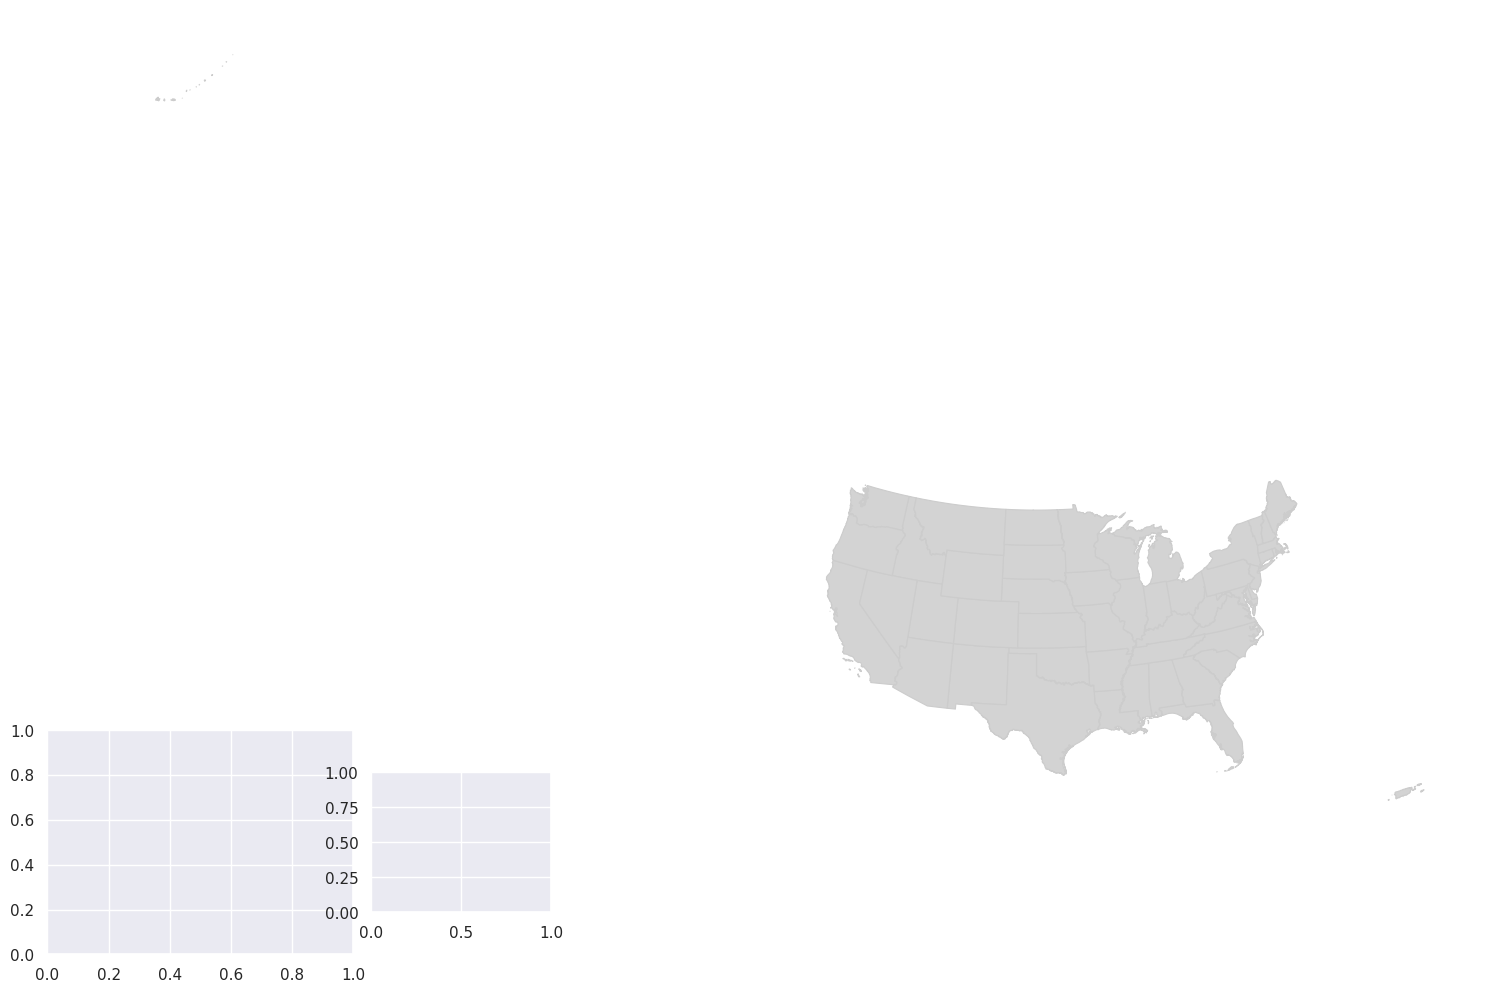

In [47]:
visframe = gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   

# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])

In [48]:
airports_states = usa_airports.state.unique()
airports_states

array(['KS', 'AK', 'AL', 'OK', 'AZ', 'CA', 'FL', 'GA', 'ID', 'IL', 'KY',
       'LA', 'MD', 'MN', 'MO', 'NJ', 'NC', 'NY', 'PA', 'OR', 'SC', 'SD',
       'TN', 'TX', 'VA', 'WA', 'WI', 'WV', 'IA', 'IN', 'MT', 'NH', 'NM',
       'NV', 'UT', 'WY', 'MS', 'CO', 'ME', 'MI', 'NE', 'OH', 'MA', 'ND',
       'VT', 'AR', 'RI', 'DE', 'CT', 'HI', 'DC'], dtype=object)

In [49]:
gdf = gdf.query("STUSPS in @airports_states")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 51 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   51 non-null     object  
 1   STATENS   51 non-null     object  
 2   AFFGEOID  51 non-null     object  
 3   GEOID     51 non-null     object  
 4   STUSPS    51 non-null     object  
 5   NAME      51 non-null     object  
 6   LSAD      51 non-null     object  
 7   ALAND     51 non-null     int64   
 8   AWATER    51 non-null     int64   
 9   geometry  51 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.4+ KB


Now, if we try it again:

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


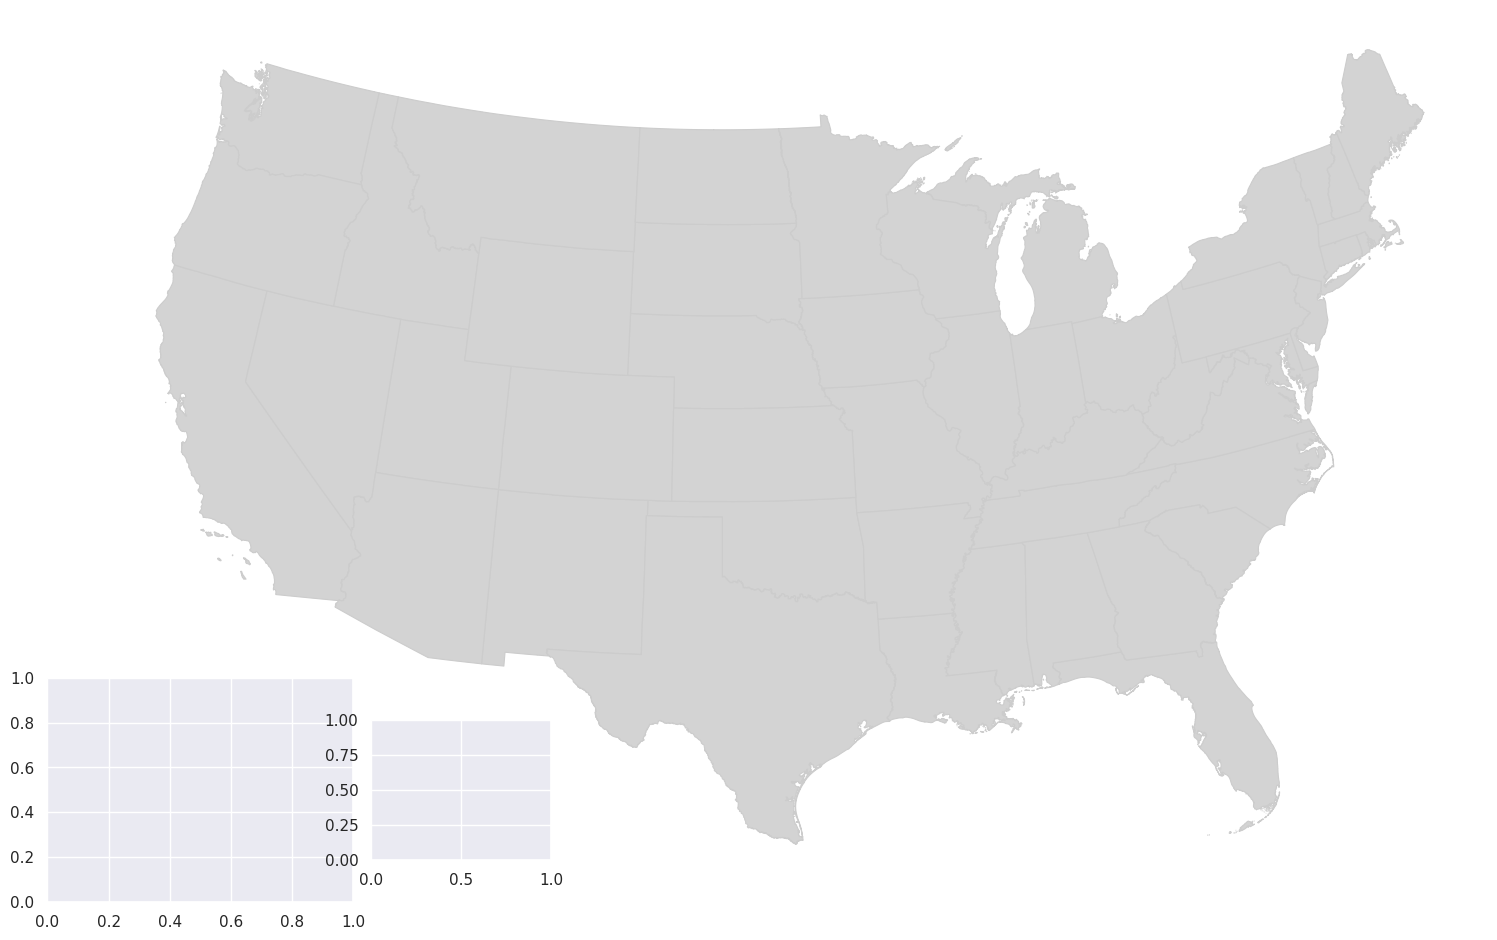

In [50]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.17, 0.16])   

# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])

Way better. Now we need to extract Alaska and Hawaii and plot our airports on the whole map.

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


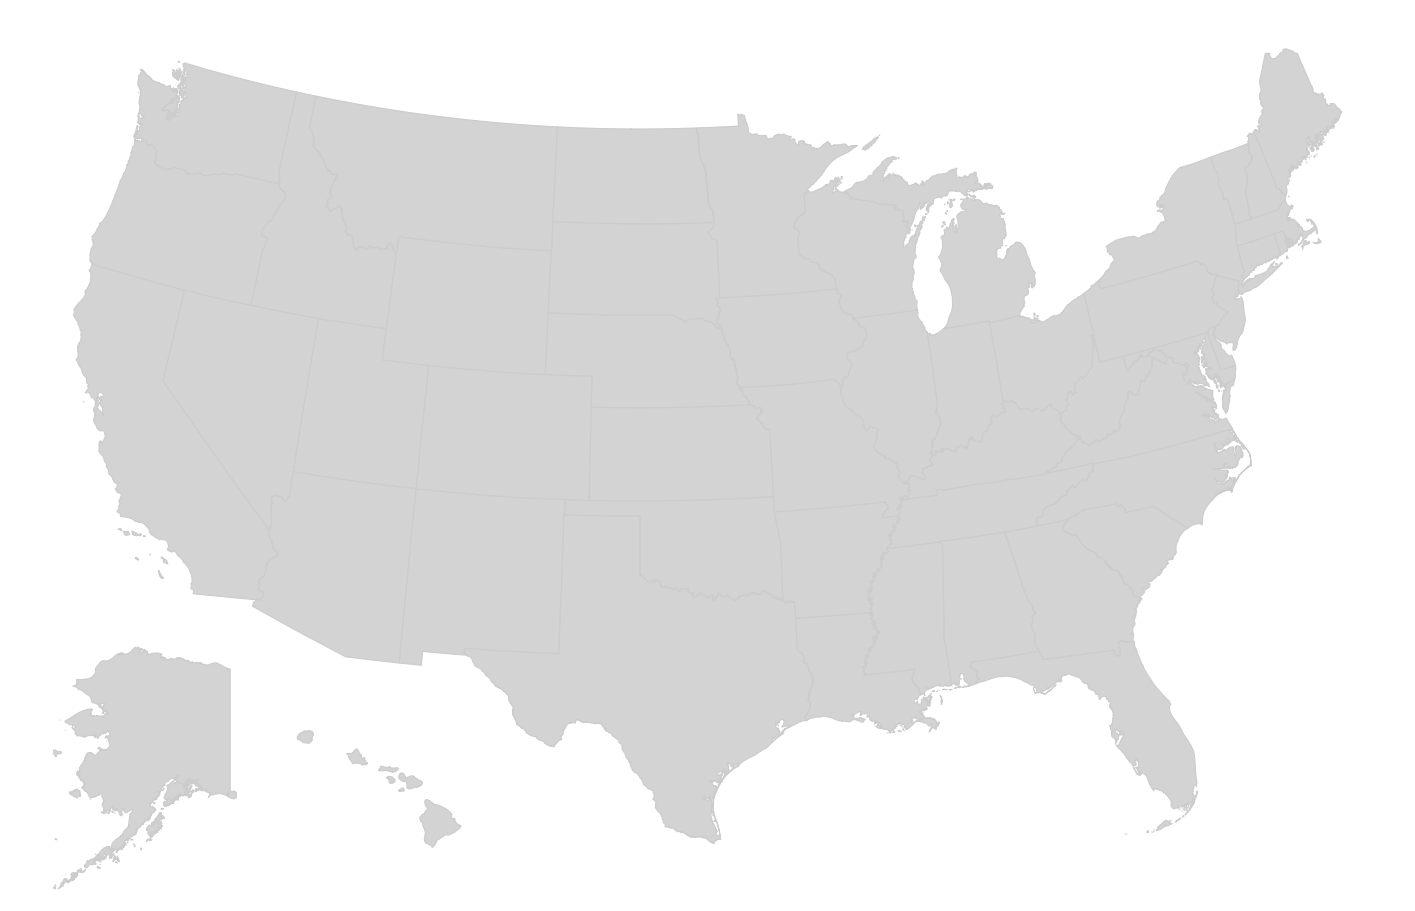

In [51]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8')


# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis("off")
# polygon to clip Hawaii
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=hiax, edgecolor='0.8')

plt.show()


It works, now we want to plot the airports points on the map.

I believe we first need to create three dataframes, one for continental US, another for Alaska(not that I think Alaska is not in the continent, but, well, you got it), and another to Hawaii. That so we can create the geometry array and the geodataframe for plotting them. But, right now I have no idea if it will work or not.

In [52]:
usa_airports_continent = usa_airports[~usa_airports.state.isin(['AK','HI'])]
geometry_continent = [Point(xy) for xy in zip(usa_airports_continent['longitude_deg'], usa_airports_continent['latitude_deg'])]
airports_continent_gdf = GeoDataFrame(usa_airports_continent, geometry=geometry_continent, crs="EPSG:4326")

usa_airports_alaska = usa_airports[usa_airports.state == 'AK']
geometry_alaska = [Point(xy) for xy in zip(usa_airports_alaska['longitude_deg'], usa_airports_alaska['latitude_deg'])]
airports_alaska_gdf = GeoDataFrame(usa_airports_alaska, geometry=geometry_alaska, crs="EPSG:4326")

usa_airports_hawaii = usa_airports[usa_airports.state == 'HI']
geometry_hawaii = [Point(xy) for xy in zip(usa_airports_hawaii['longitude_deg'], usa_airports_hawaii['latitude_deg'])]
airports_hawaii_gdf = GeoDataFrame(usa_airports_hawaii, geometry=geometry_hawaii, crs="EPSG:4326")


Now I try to plot it alongside the US map previously done, starting by the continent points...

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


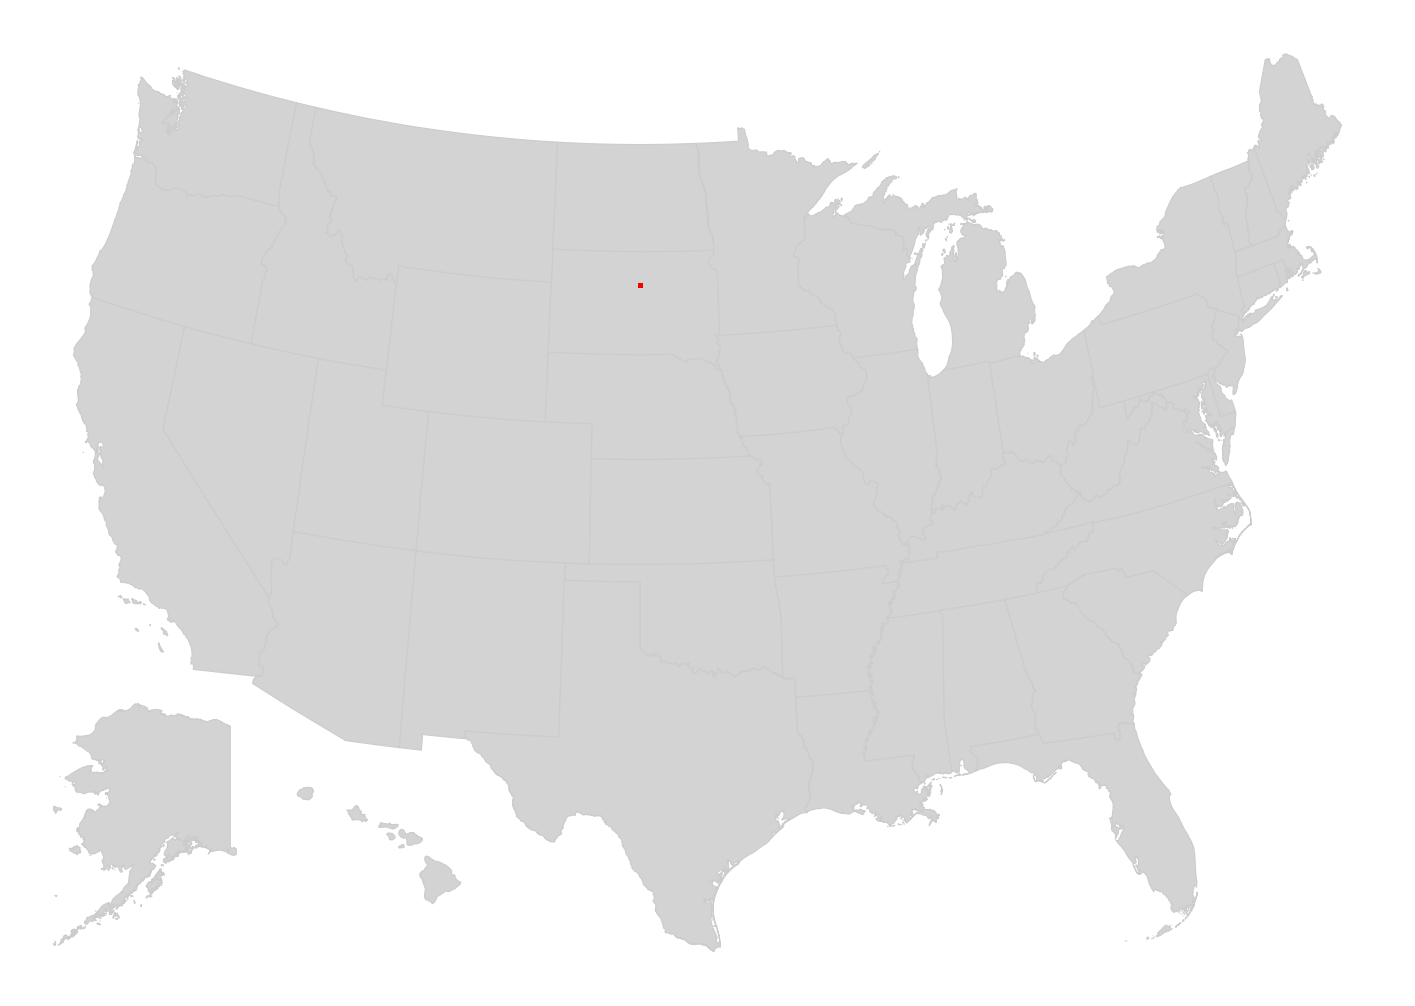

In [53]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
airports_continent_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.2, zorder=2)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-140, 72),(-140,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8')


# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis("off")
# polygon to clip Hawaii
hipolygon = Polygon([(-160,0),(-160,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=hiax, edgecolor='0.8')

plt.show()


We see only one point in the map. If we plot only the continent points to have an idea of what is going wrong...

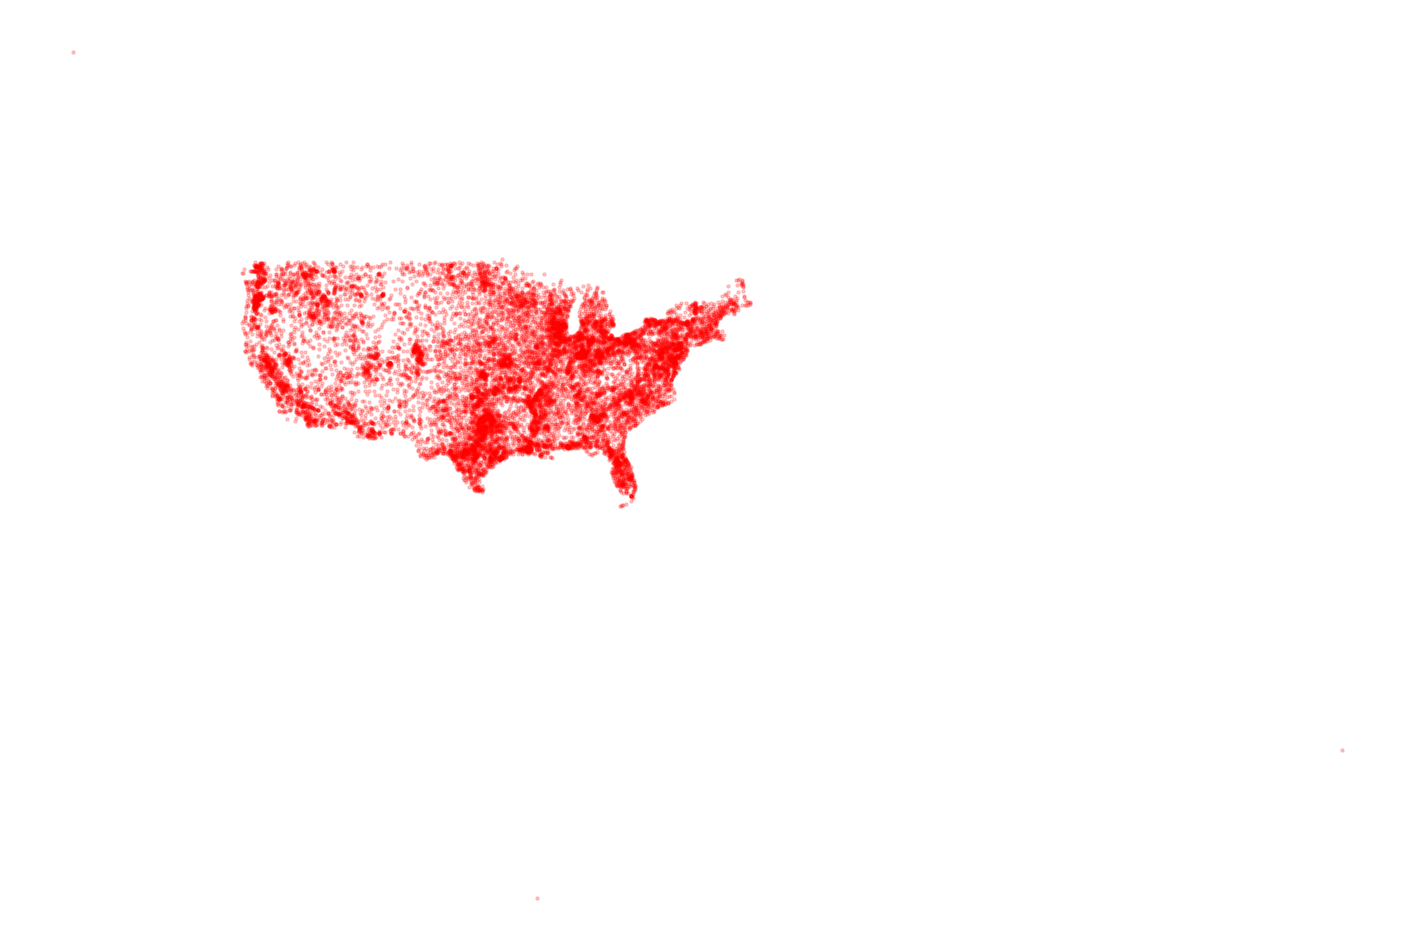

In [54]:
fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
airports_continent_gdf.plot(ax=ax, color='red', markersize=5, alpha=0.2, zorder=2)

plt.show()

Beyond the fact that I didn't change the CRS to match the background map, there are some airports outside the continental USA in our geodataframe. we will need to clean that up.

In [55]:
usa_airports[~usa_airports.state.isin(['AK','HI'])].query("latitude_deg > 50 or latitude_deg < 25 or longitude_deg > -60")

ident            type                                         name  \
8623      7FA1   small_airport                    Sugar Loaf Shores Airport   
24465     FD51   small_airport                  Summerland Key Cove Airport   
36129     KEYW  medium_airport               Key West International Airport   
37185     KMTH  medium_airport            The Florida Keys Marathon Airport   
37304     KNQX  medium_airport  Naval Air Station Key West/Boca Chica Field   
37735     KQKA   small_airport                          Aban Uqua Airportse   
47454     NX01   small_airport         (Duplicate)Cole Landing Zone Airport   
65806  US-3040   small_airport                      Kaktovik South Airstrip   

       latitude_deg  longitude_deg  elevation_ft iso_region    municipality  \
8623      24.648938     -81.578357           4.0      US-FL        Key West   
24465     24.658796     -81.445341           4.0      US-FL  Summerland Key   
36129     24.556101     -81.759598           3.0      US-FL        Key West   
37185     24.726101     -81.051399           5.0      US-FL        Marathon   
37304     24.575800     -81.688904           6.0      US-FL        Key West   
37735    -14.735092     -91.112751           NaN      US-ID      KXXQO City   
47454      0.040000      -0.040000         811.0      US-AR             NaN   
65806     70.113080    -143.655033           NaN      US-AL        Kaktovik   

      scheduled_service state  
8623                 no    FL  
24465                no    FL  
36129               yes    FL  
37185                no    FL  
37304                no    FL  
37735                no    ID  
47454                no    AR  
65806                no    AL

Searching for each of those airports on [airnav](https://www.airnav.com/), I could see that with excemption of the last three, their data is correct, they are just scattered over the FL islands. And the last three I was not able to find there. For the sake of simplicity I will remove them from the dataset.

In [56]:
indexes_to_remove = usa_airports[~usa_airports.state.isin(['AK','HI'])].query("latitude_deg > 50 or latitude_deg < 25 or longitude_deg > -60").index
usa_airports.drop(indexes_to_remove, axis=0, inplace=True)

Now we check the plot again...

In [57]:
usa_airports_continent = usa_airports[~usa_airports.state.isin(['AK','HI'])]
geometry_continent = [Point(xy) for xy in zip(usa_airports_continent['longitude_deg'], usa_airports_continent['latitude_deg'])]
airports_continent_gdf = GeoDataFrame(usa_airports_continent, geometry=geometry_continent, crs="EPSG:4326")

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


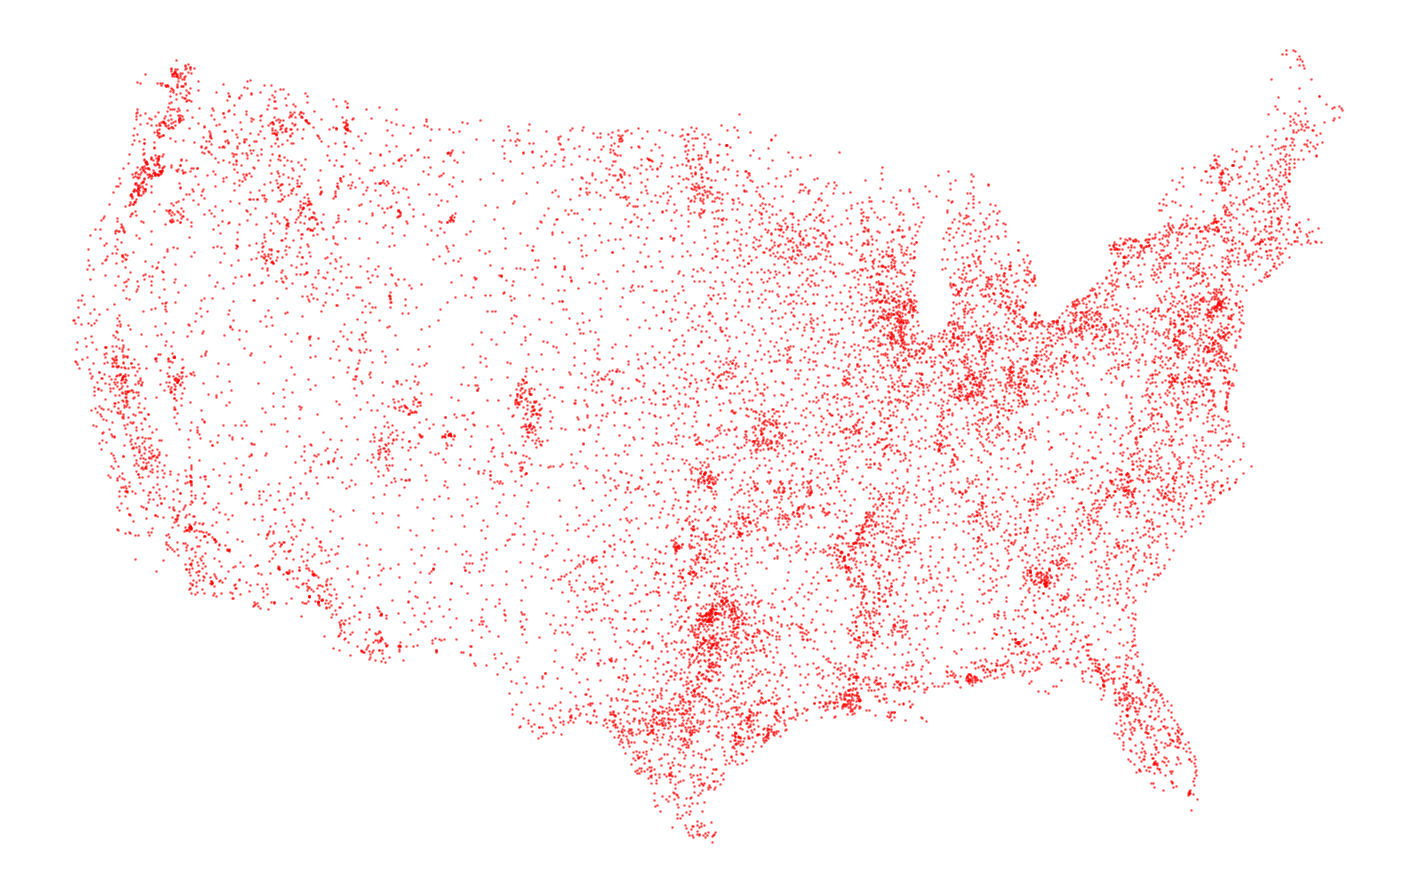

In [58]:
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
viscontinent_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

plt.show()

Now let's check how AK would be displayed...

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

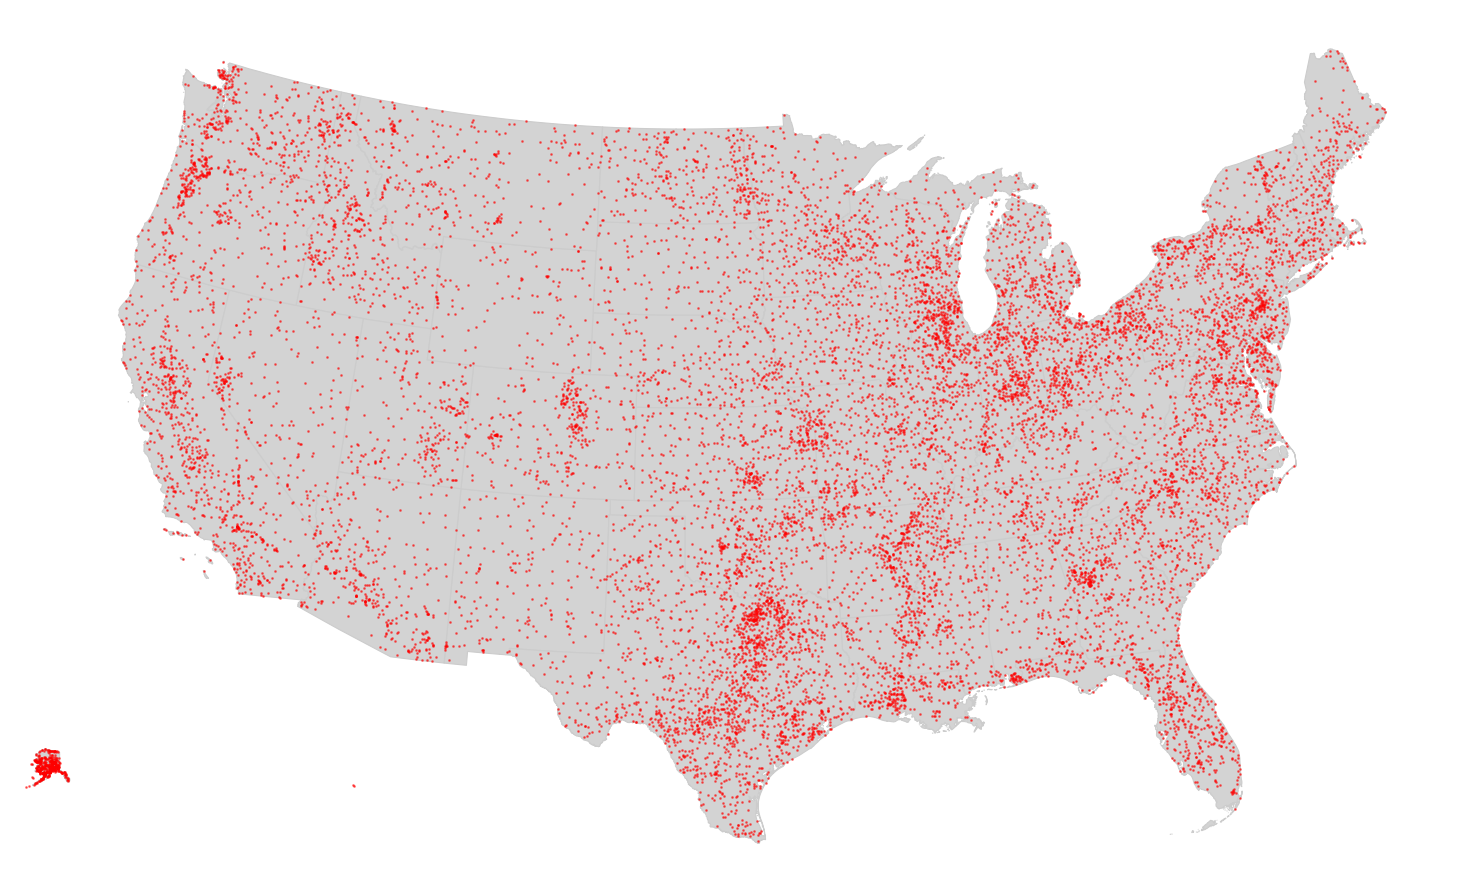

In [59]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
viscontinent_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8', zorder=1)
airports_alaska_gdf.plot(ax=akax, color='red', markersize=1, alpha=0.5, zorder=2)

We can see Alaska geoframe also has some "outliers". Let's clean that.

In [60]:
usa_airports[usa_airports.state == 'AK'].query("longitude_deg > -130")

ident            type                            name  latitude_deg  \
49084  PAAT   small_airport  Casco Cove Coast Guard Station     52.829797   
49251  PASY  medium_airport           Eareckson Air Station     52.712299   

       longitude_deg  elevation_ft iso_region municipality scheduled_service  \
49084     173.173796          40.0      US-AK         Attu                no   
49251     174.113998          95.0      US-AK       Shemya                no   

      state  
49084    AK  
49251    AK

Very remote airports to the west of Alaska. Again, for the sake of simplicity, let's remove them.

In [61]:
indexes_to_remove = usa_airports[usa_airports.state == 'AK'].query("longitude_deg > -130").index
usa_airports.drop(indexes_to_remove, axis=0, inplace=True)

Rebuild the charts till here...

In [62]:
usa_airports_alaska = usa_airports[usa_airports.state == 'AK']
geometry_alaska = [Point(xy) for xy in zip(usa_airports_alaska['longitude_deg'], usa_airports_alaska['latitude_deg'])]
airports_alaska_gdf = GeoDataFrame(usa_airports_alaska, geometry=geometry_alaska, crs="EPSG:4326")

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

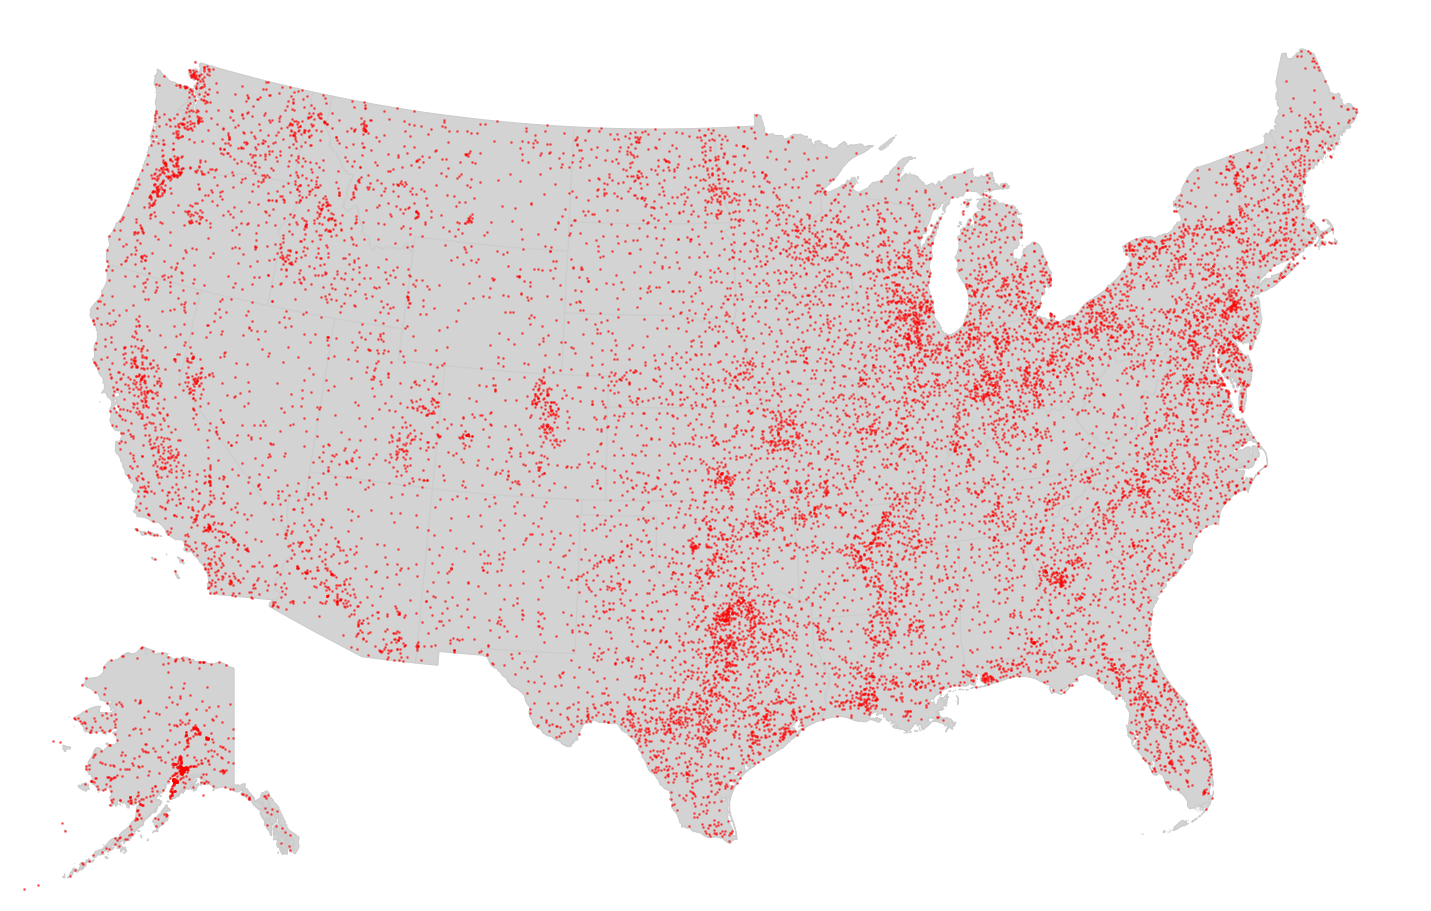

In [63]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
viscontinent_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8', zorder=1)
airports_alaska_gdf.plot(ax=akax, color='red', markersize=1, alpha=0.5, zorder=2)

And last but not least, we check Hawaii...

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

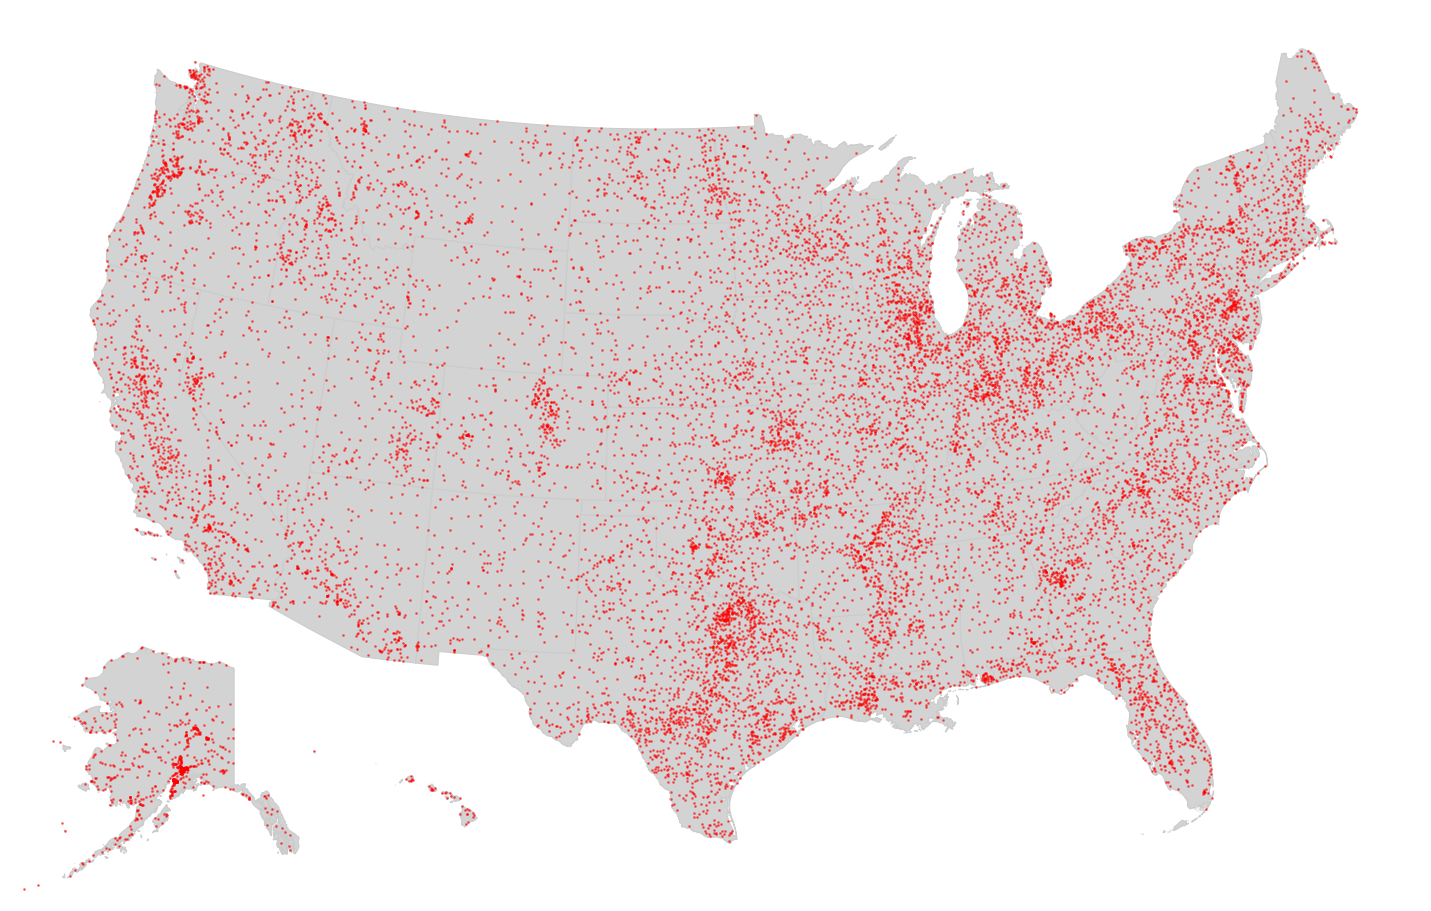

In [64]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
viscontinent_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8', zorder=1)
airports_alaska_gdf.plot(ax=akax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.28, 0.20, 0.1, 0.1])
hiax.axis("off")
# polygon to clip Hawaii
hipolygon = Polygon([(-167,0),(-167,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=hiax, edgecolor='0.8')
airports_hawaii_gdf.plot(ax=hiax, color='red', markersize=1, alpha=0.5, zorder=2)

Although it AK and HI maps didn't overlap, we can see that there are some points to the west of HI, which made its plot very small and confusing. So let's check what is that outlier and clean it.

<Axes: >

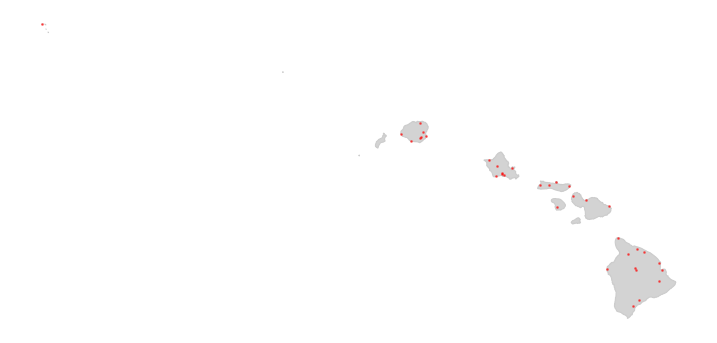

In [65]:
fig, ax = plt.subplots(1, figsize=(9, 7))
ax.axis('off')

# polygon to clip Hawaii
hipolygon = Polygon([(-167,0),(-167,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8')
airports_hawaii_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

In [66]:
min_longitude = usa_airports.query("state == 'HI'")['longitude_deg'].min()
usa_airports[(usa_airports.state == 'HI') & (usa_airports.longitude_deg == min_longitude)]

ident           type                           name  latitude_deg  \
50069  PHHF  small_airport  French Frigate Shoals Airport     23.869328   

       longitude_deg  elevation_ft iso_region municipality scheduled_service  \
50069    -166.285829           6.0      US-HI  Tern Island                no   

      state  
50069    HI

In [67]:
usa_airports.drop(index=50069, axis = 0, inplace=True)

And now the final plot...

In [68]:
usa_airports_hawaii = usa_airports[usa_airports.state == 'HI']
geometry_hawaii = [Point(xy) for xy in zip(usa_airports_hawaii['longitude_deg'], usa_airports_hawaii['latitude_deg'])]
airports_hawaii_gdf = GeoDataFrame(usa_airports_hawaii, geometry=geometry_hawaii, crs="EPSG:4326")

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

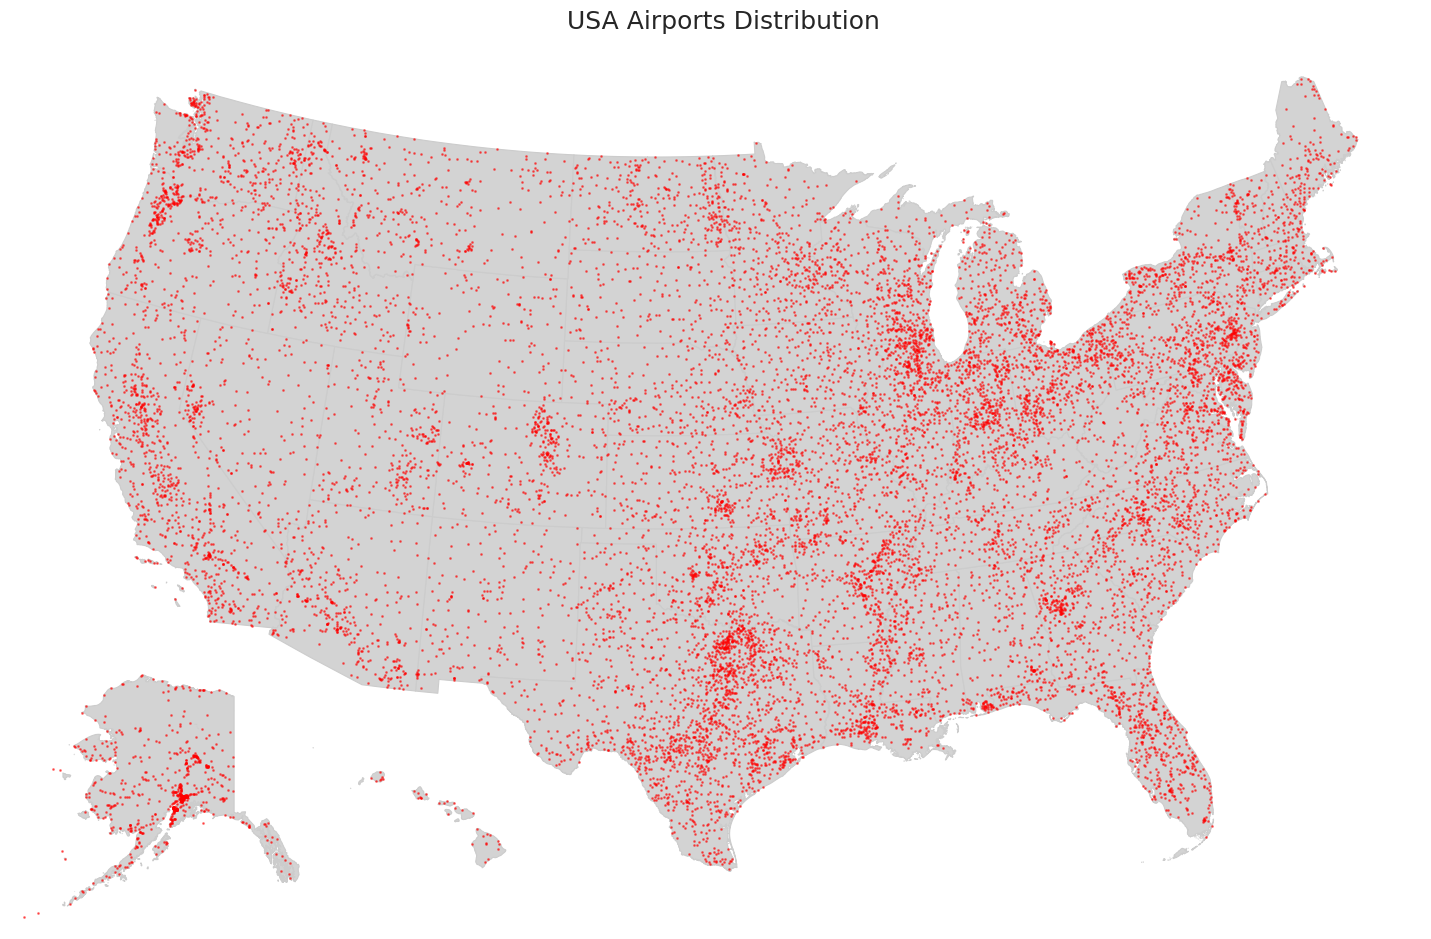

In [69]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')
ax.set_title("USA Airports Distribution", fontsize=18)

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
viscontinent_gdf.plot(ax=ax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8', zorder=1)
airports_alaska_gdf.plot(ax=akax, color='red', markersize=1, alpha=0.5, zorder=2)

# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.21, 0.17, 0.19, 0.19])
hiax.axis("off")
# polygon to clip Hawaii
hipolygon = Polygon([(-167,0),(-167,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=hiax, edgecolor='0.8', zorder=1)
airports_hawaii_gdf.plot(ax=hiax, color='red', markersize=1, alpha=0.5, zorder=2)

In [70]:
viscontinent_gdf['type'].unique()

array(['small_airport', 'medium_airport', 'large_airport'], dtype=object)

/home/fernando/anaconda3/envs/datasciencepython/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


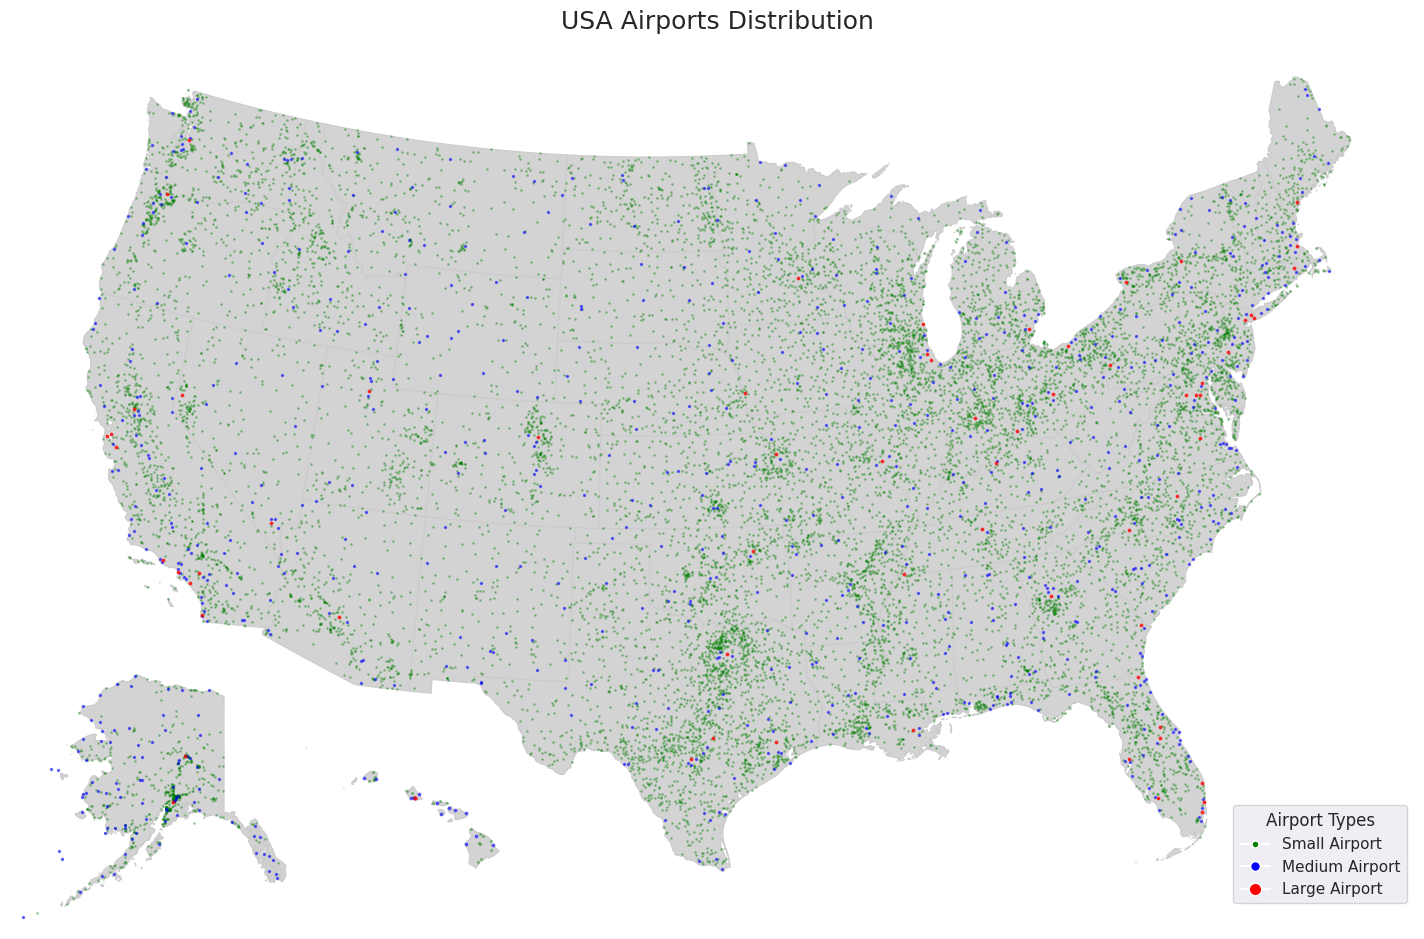

In [71]:
# changes the Coordinate Reference System for a better USA projection.
visframe = gdf.to_crs({"init": "epsg:2163"})
viscontinent_gdf = airports_continent_gdf.to_crs({"init": "epsg:2163"})

fig, ax = plt.subplots(1, figsize=(18, 14))
ax.axis('off')
ax.set_title("USA Airports Distribution", fontsize=18)

# create map of all states except AK and HI in the main map axis
visframe[~visframe.STUSPS.isin(['HI','AK'])].plot(color='lightgrey', linewidth=0.8, ax=ax, edgecolor='0.8', zorder=1)
# plotting the airports types in different colors
viscontinent_gdf[viscontinent_gdf['type'] == 'small_airport'].plot(ax=ax, color='green', markersize=1, alpha=0.3, zorder=2)
viscontinent_gdf[viscontinent_gdf['type'] == 'medium_airport'].plot(ax=ax, color='blue', markersize=2, alpha=0.5, zorder=3)
viscontinent_gdf[viscontinent_gdf['type'] == 'large_airport'].plot(ax=ax, color='red', markersize=3, alpha=0.7, zorder=4)

# Add Alaska Axis(a box) (x, y, width, height)
akax = fig.add_axes([0.1, 0.17, 0.2, 0.19])   
akax.axis('off')
# polygon to clip Alaska
polygon = Polygon([(-170,50),(-170,72),(-130, 72),(-130,50)])
alaska_gdf = gdf[gdf.STUSPS=='AK']
alaska_gdf.clip(polygon).plot(color='lightgrey', linewidth=0.8, ax=akax, edgecolor='0.8', zorder=1)
airports_alaska_gdf[airports_alaska_gdf['type'] == 'small_airport'].plot(ax=akax, color='green', markersize=1, alpha=0.3, zorder=2)
airports_alaska_gdf[airports_alaska_gdf['type'] == 'medium_airport'].plot(ax=akax, color='blue', markersize=2, alpha=0.5, zorder=3)
airports_alaska_gdf[airports_alaska_gdf['type'] == 'large_airport'].plot(ax=akax, color='red', markersize=3, alpha=0.7, zorder=4)

# Add Hawaii Axis(a box) (x, y, width, height)
hiax = fig.add_axes([.21, 0.17, 0.19, 0.19])
hiax.axis("off")
# polygon to clip Hawaii
hipolygon = Polygon([(-167,0),(-167,90),(-120,90),(-120,0)])
hawaii_gdf = gdf[gdf.STUSPS=='HI']
hawaii_gdf.clip(hipolygon).plot(color='lightgrey', linewidth=0.8, ax=hiax, edgecolor='0.8', zorder=1)
airports_hawaii_gdf[airports_hawaii_gdf['type'] == 'small_airport'].plot(ax=hiax, color='green', markersize=2, alpha=0.3, zorder=2)
airports_hawaii_gdf[airports_hawaii_gdf['type'] == 'medium_airport'].plot(ax=hiax, color='blue', markersize=3, alpha=0.5, zorder=3)
airports_hawaii_gdf[airports_hawaii_gdf['type'] == 'large_airport'].plot(ax=hiax, color='red', markersize=5, alpha=0.7, zorder=4)

# Create custom legend entries
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Small Airport',
           markerfacecolor='green', markersize=5),
    Line2D([0], [0], marker='o', color='w', label='Medium Airport',
           markerfacecolor='blue', markersize=7),
    Line2D([0], [0], marker='o', color='w', label='Large Airport',
           markerfacecolor='red', markersize=9)
]

# Add legend to the plot
ax.legend(handles=legend_elements, loc='lower right', title='Airport Types')
plt.show()